## Análisis exploratorio de datos

Análisis Univariado
El análisis univariado se centra en el estudio de una sola variable a la vez. Su objetivo es entender la distribución, la tendencia central, la dispersión y la presencia de valores atípicos de esa variable. Los métodos y herramientas utilizados en el análisis univariado varían según el tipo de variable (numérica o categórica).

            Variables Numéricas
Medidas de Tendencia Central:

Media: El promedio de los valores. Mediana: El valor central en una distribución ordenada. Moda: El valor más frecuente en el conjunto de datos. Medidas de Dispersión:

Varianza: La media de las diferencias al cuadrado respecto a la media. Desviación estándar: La raíz cuadrada de la varianza. Rango: La diferencia entre el valor máximo y el mínimo. Percentiles y cuartiles: Valores que dividen la distribución en partes iguales. Gráficos:

Histogramas: Muestran la frecuencia de los valores en intervalos específicos. Boxplots (diagramas de caja): Representan la mediana, cuartiles y posibles valores atípicos. Distribución:

Análisis de la forma de la distribución: Asimetría y curtosis. Pruebas de normalidad: Shapiro-Wilk, Kolmogorov-Smirnov, entre otras.

             Variables Categóricas
Frecuencia:

Tablas de frecuencia: Cuenta de ocurrencias de cada categoría. Porcentajes: Proporción de cada categoría respecto al total. Gráficos:

Gráficos de barras: Visualización de la frecuencia de cada categoría. Gráficos de pastel: Representación proporcional de cada categoría.

Análisis Bivariado
El análisis bivariado estudia la relación entre dos variables. Dependiendo de los tipos de variables (numéricas o categóricas), se utilizan diferentes métodos y herramientas para explorar estas relaciones.

              Variables Numéricas
Correlación:

Coeficiente de correlación de Pearson: Mide la relación lineal entre dos variables numéricas. Coeficiente de correlación de Spearman: Mide la relación monotónica entre dos variables numéricas. Gráficos:

Scatter plots (diagramas de dispersión): Muestran la relación entre dos variables mediante puntos en un plano cartesiano. Heatmaps: Muestran la matriz de correlación de varias variables numéricas. Regresión Lineal:

Análisis de regresión: Modela la relación entre una variable dependiente y una o más variables independientes. Variables Categóricas Tablas de Contingencia:

Tablas cruzadas: Muestran la frecuencia conjunta de dos variables categóricas. Gráficos:

Gráficos de barras apiladas o agrupadas: Visualizan la distribución conjunta de dos variables categóricas. Pruebas Estadísticas:

Chi-cuadrado de independencia: Evalúa si existe una relación significativa entre dos variables categóricas. Variables Mixtas (Numéricas y Categóricas) Boxplots:

Comparan la distribución de una variable numérica entre las diferentes categorías de una variable categórica. Gráficos de violín:

Muestran la distribución de una variable numérica en diferentes categorías de una variable categórica, combinando boxplots y densidad de probabilidad. Análisis de Varianza (ANOVA):

Prueba estadística para comparar las medias de una variable numérica entre varias categorías de una variable categórica.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro, kstest, norm, skew, kurtosis
import statsmodels.api as sm

sns.set(style = 'darkgrid')
colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857',"8c564b"]


In [2]:
data = pd.read_csv("D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/Financials_.csv")
data.drop("Unnamed: 0",axis=1, inplace=True)
data.head(5)

segment  country      product discount_band  units_sold  \
0  Government   Canada   Carretera          None       1618.5   
1  Government  Germany   Carretera          None       1321.0   
2   Midmarket   France   Carretera          None       2178.0   
3   Midmarket  Germany   Carretera          None        888.0   
4   Midmarket   Mexico   Carretera          None       2470.0   

   manufacturing_price  sale_price  gross_sales discounts    sales     cogs  \
0                  3.0        20.0      32370.0            32370.0  16185.0   
1                  3.0        20.0      26420.0            26420.0  13210.0   
2                  3.0        15.0      32670.0            32670.0  21780.0   
3                  3.0        15.0      13320.0            13320.0   8880.0   
4                  3.0        15.0      37050.0            37050.0  24700.0   

       profit        date  month_number month_name  year  
0   16185.00   2014-01-01             1   January   2014  
1   13210.00   2014-01-01             1   January   2014  
2   10890.00   2014-01-06             6      June   2014  
3    4440.00   2014-01-06             6      June   2014  
4   12350.00   2014-01-06             6      June   2014

### Analisis Univariado

In [3]:
null_values = ['NaN', 'nan', 'null', 'None', '', ' ']

# Reemplazar estos valores en el DataFrame con np.nan
data.replace(null_values, np.nan, inplace=True)
data['discounts'] = pd.to_numeric(data['discounts'], errors='coerce')
data['profit'] = pd.to_numeric(data['profit'], errors='coerce')
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [4]:
num_col = []
cat_col = []
for col in data.columns:
    if data[col].dtype == "object":
        cat_col.append(col)
    else:
        num_col.append(col)
print(num_col)
print(cat_col)

['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'year']
['segment', 'country', 'product', 'discount_band', 'month_name']


#### Analissi de variables categoricas

In [17]:
print(f"La varialbe segment tiene {data['segment'].nunique()} valores")
Conteo = data["segment"].groupby(data["segment"]).count()
porcentaje = data["segment"].groupby(data["segment"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe segment tiene 5 valores


Count  Percentage
segment                            
Channel Partners    100   14.285714
Enterprise          100   14.285714
Government          300   42.857143
Midmarket           100   14.285714
Small Business      100   14.285714

In [18]:
print(f"La varialbe country tiene {data['country'].nunique()} valores")
Conteo = data["country"].groupby(data["country"]).count()
porcentaje = data["country"].groupby(data["country"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe country tiene 5 valores


Count  Percentage
country                                    
Canada                      140        20.0
France                      140        20.0
Germany                     140        20.0
Mexico                      140        20.0
United States of America    140        20.0

In [19]:
print(f"La varialbe product tiene {data['product'].nunique()} valores")
Conteo = data["product"].groupby(data["product"]).count()
porcentaje = data["product"].groupby(data["product"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe product tiene 6 valores


Count  Percentage
product                      
Amarilla       94   13.428571
Carretera      93   13.285714
Montana        93   13.285714
Paseo         202   28.857143
VTT           109   15.571429
Velo          109   15.571429

In [20]:
print(f"La varialbe discount_band tiene {data['discount_band'].nunique()} valores")
Conteo = data["discount_band"].groupby(data["discount_band"]).count()
porcentaje = data["discount_band"].groupby(data["discount_band"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe discount_band tiene 4 valores


Count  Percentage
discount_band                   
High             245   35.000000
Low              160   22.857143
Medium           242   34.571429
None              53    7.571429

In [21]:
print(f"La varialbe month_name tiene {data['month_name'].nunique()} valores")
Conteo = data["month_name"].groupby(data["month_name"]).count()
porcentaje = data["month_name"].groupby(data["month_name"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe month_name tiene 12 valores


Count  Percentage
month_name                   
April          35         5.0
August         35         5.0
December      105        15.0
February       35         5.0
January        35         5.0
July           35         5.0
June           70        10.0
March          35         5.0
May            35         5.0
November       70        10.0
October       140        20.0
September      70        10.0

In [22]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

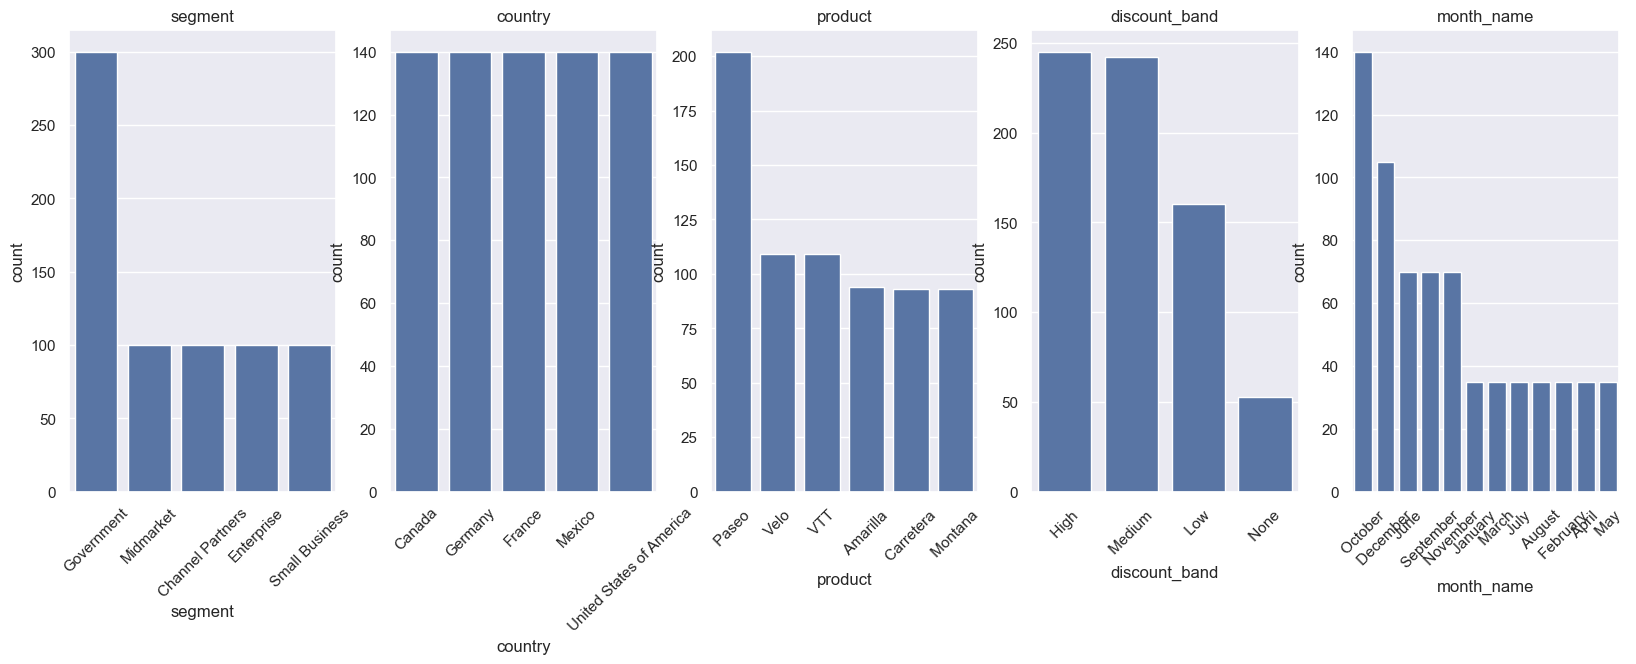

In [31]:
custom_palette = sns.color_palette("Set2")
palette = sns.color_palette()
fig, ax = plt.subplots(1,len(cat_col), figsize=(20, 6))
fig.subplots_adjust(hspace = 0.5)
for i, col in enumerate(cat_col):
    sns.countplot(ax=ax[i], x=col, data=data,
                  order=data[col].value_counts().index)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=45)
plt.show()

#### Análisis de variables numericas

In [32]:
def analize(data):
    results = []
    for column in data.columns:
        col_data = data[column]
        n = len(col_data)
        
        #Coeficiente de asimetria
        Kp = 3 * (np.mean(col_data) - np.median(col_data)) / np.std(col_data)
        Q1, Q3 = np.percentile(col_data, [25, 75])
        Kb = (Q3 + Q1 - 2 * np.median(col_data)) / (Q3 - Q1)
        A3 = skew(col_data)
        
        #Coeficiente de curtosis
        A4 = kurtosis(col_data)
        
        # Pruebas de normalidad
        shapiro_test = shapiro(col_data)
        ks_test = kstest(col_data, 'norm', args=(np.mean(col_data), np.std(col_data)))
        
        results.append([
            column,
            Kp, Kb, A3,
            A4,
            shapiro_test.pvalue, ks_test.pvalue
        ])
        
            # Crear el DataFrame
    columns = pd.MultiIndex.from_tuples([
        ('', 'Variable'),
        ('Prueba de asimetría', 'Pearson Kp'),
        ('Prueba de asimetría', 'Bowley Kb'),
        ('Prueba de asimetría', 'Fisher A3'),
        ('Prueba de curtosis', 'Fisher A4'),
        ('Prueba de normalidad', 'Shapiro-Wilk p-value'),
        ('Prueba de normalidad', 'Kolmogorov-Smirnov p-value')
    ])
    

    results_df = pd.DataFrame(results, columns=columns)
    return results_df

In [48]:
data_numeric = data.select_dtypes(exclude='object')

analize(data_numeric)

Prueba de asimetría                      \
              Variable          Pearson Kp Bowley Kb Fisher A3   
0           units_sold            0.227712  0.037100  0.435218   
1  manufacturing_price            2.390522  0.959184  0.591313   
2           sale_price            2.160451  0.944444  0.769628   
3          gross_sales            1.709451  0.842617  1.670333   
4            discounts                 NaN       NaN       NaN   
5                sales            1.700251  0.839998  1.692658   
6                 cogs            1.810854  0.873875  1.545726   
7               profit                 NaN       NaN       NaN   
8         month_number           -0.977805 -0.444444 -0.577052   
9                 year           -1.732051 -1.000000 -1.154701   

  Prueba de curtosis Prueba de normalidad                             
           Fisher A4 Shapiro-Wilk p-value Kolmogorov-Smirnov p-value  
0          -0.321629         7.461945e-11               2.774708e-02  
1          -1.427335         1.623808e-32               2.220851e-73  
2          -1.176959         1.544574e-32               7.423847e-71  
3           2.031097         1.926938e-32               3.517149e-42  
4                NaN                  NaN                        NaN  
5           2.164472         1.694194e-32               1.957803e-42  
6           1.588438         5.713478e-32               1.135389e-47  
7                NaN                  NaN                        NaN  
8          -0.881452         1.426135e-20               5.172326e-21  
9          -0.666667         3.149122e-39              3.632824e-141

In [41]:

def analyze_data(data):
    # Iterar sobre cada columna numérica en el DataFrame
    #colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']
    for column in data.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        fig.suptitle(f'Análisis de {column}', fontsize=16)
        #Pruebas de Asmetria y coutosis
        mean = data[column].mean()
        median = data[column].median()
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        var = data[column].var()
        std = data[column].std()
        mod = data[column].mode().iloc[0]
        Kp = 3 * (np.mean(data[column]) - np.median(data[column])) / np.std(data[column])
        A4 = kurtosis(data[column])
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0])
        axes[0].set_title('Histograma')
        axes[0].set_ylabel("")
        axes[0].set_xlabel("")
        axes[0].axvline(x=mean, color = "red", linestyle = "--",
                        label = f"Mean: {round(mean,2)}")
        axes[0].axvline(x = mod, color="#f4d35e", label = f"Mode: {round(mod,2)}")
        axes[0].legend()
        
        # Boxplot
        sns.boxplot(x=data[column], ax=axes[1])
        axes[1].set_title('Diagrama de caja')
        axes[1].set_xlabel("")
        axes[1].axvline(x=median, color= "red", linestyle= "--", label = f"Median: {round(median,2)}")
        axes[1].axvline(x=Q1, color= "#669bbc", label = f"Q1: {round(Q1,2)}")
        axes[1].axvline(x=Q3, color= "#f4d35e", label = f"Q3: {round(Q3,2)}")
        axes[1].legend()
        #kdeplot
        sns.kdeplot(data[column], fill= True,ax=axes[2], color= "#c1121f",
                    label =f"Var:{round(var,2)}\n Std:{round(std,3)}\n Asimetria Kp:{round(Kp,2)} \n Curtosis A4:{round(A4,2)}")
        axes[2].set_title('Kdeplot')
        axes[2].set_ylabel("")
        axes[2].set_xlabel("")
        axes[2].legend()

        
        # Scatter
        sns.scatterplot(x=data[column], y=range(len(data[column])), ax=axes[3])
        axes[3].set_title('Gráfico de dispersión')
        axes[3].set_xlabel("")
        axes[3].set_ylabel('')
        #x=range(len(data[column])), y=data[column]
        axes[3].set_title("Grafico de dispersion")
        # Mostrar los gráficos
        plt.tight_layout()
        plt.show()

In [49]:
data_numeric.head(2)

units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
0      1618.5                  3.0        20.0      32370.0        NaN   
1      1321.0                  3.0        20.0      26420.0        NaN   

     sales     cogs   profit  month_number  year  
0  32370.0  16185.0  16185.0             1  2014  
1  26420.0  13210.0  13210.0             1  2014

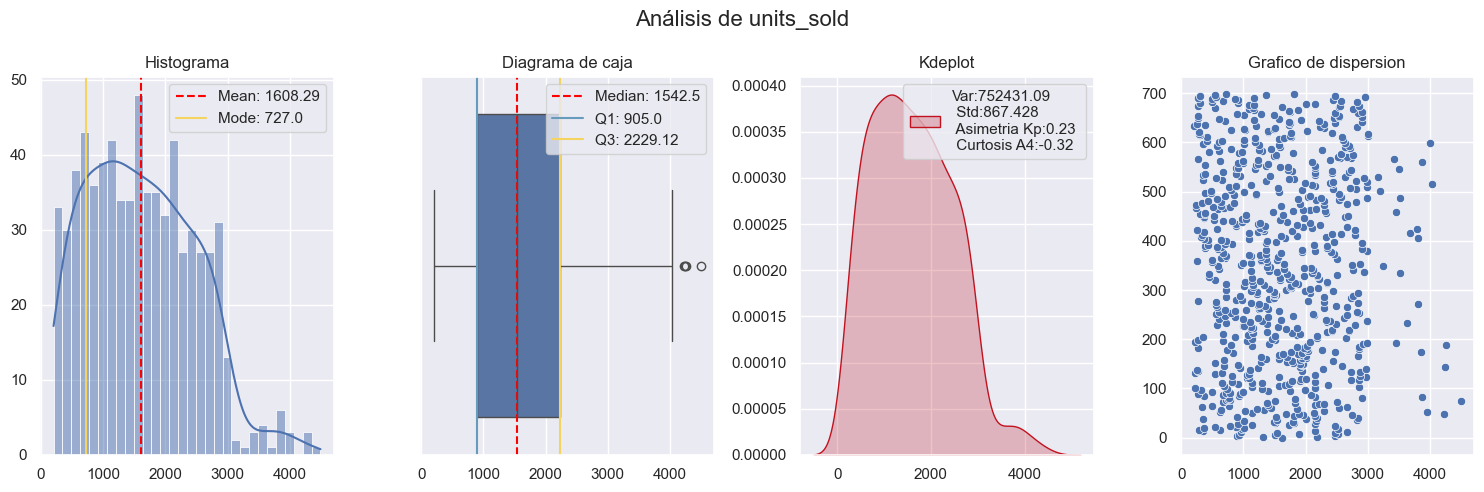

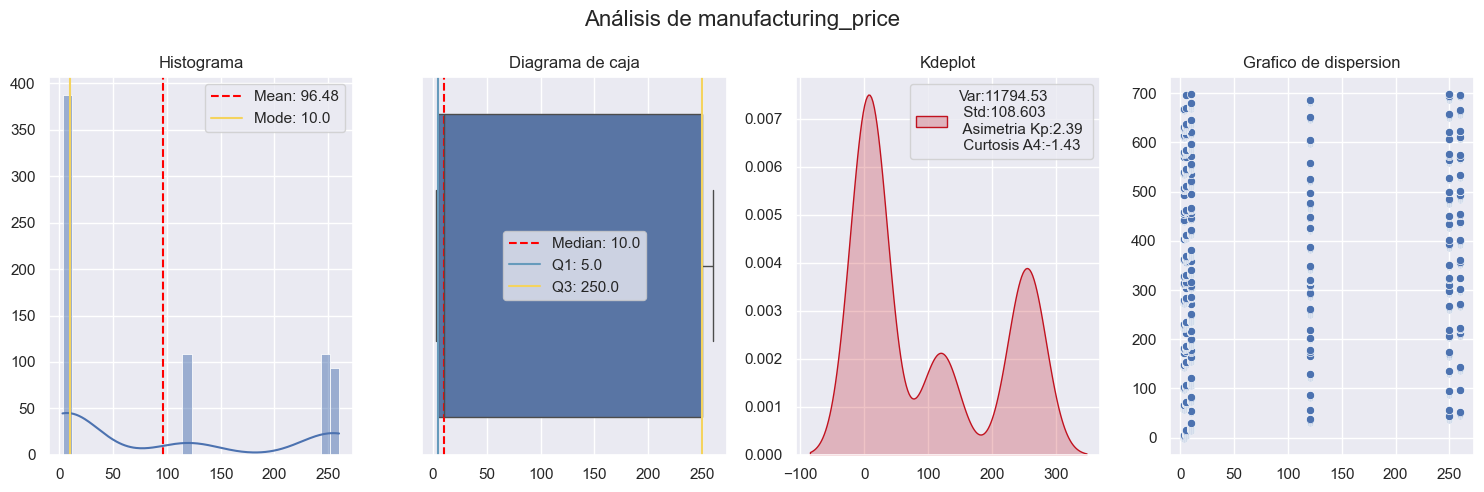

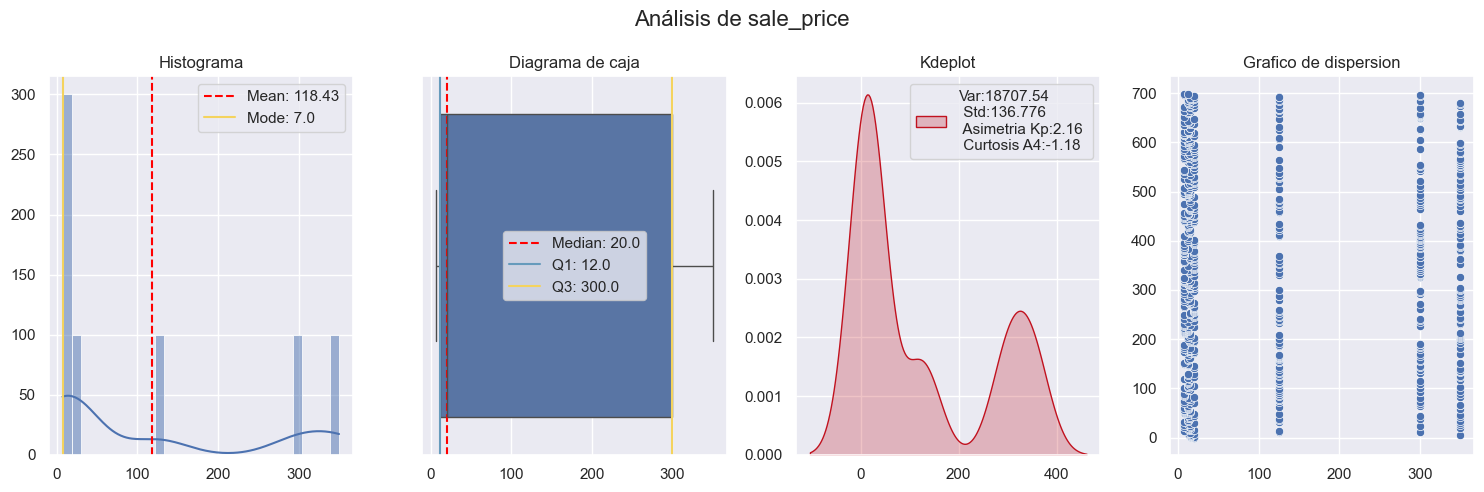

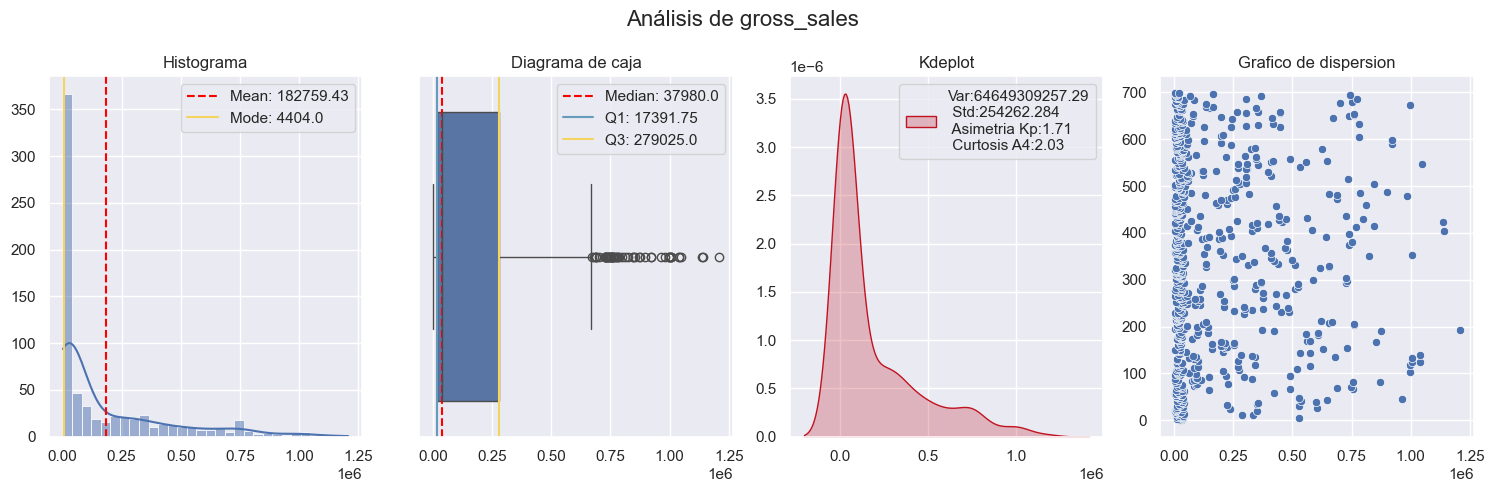

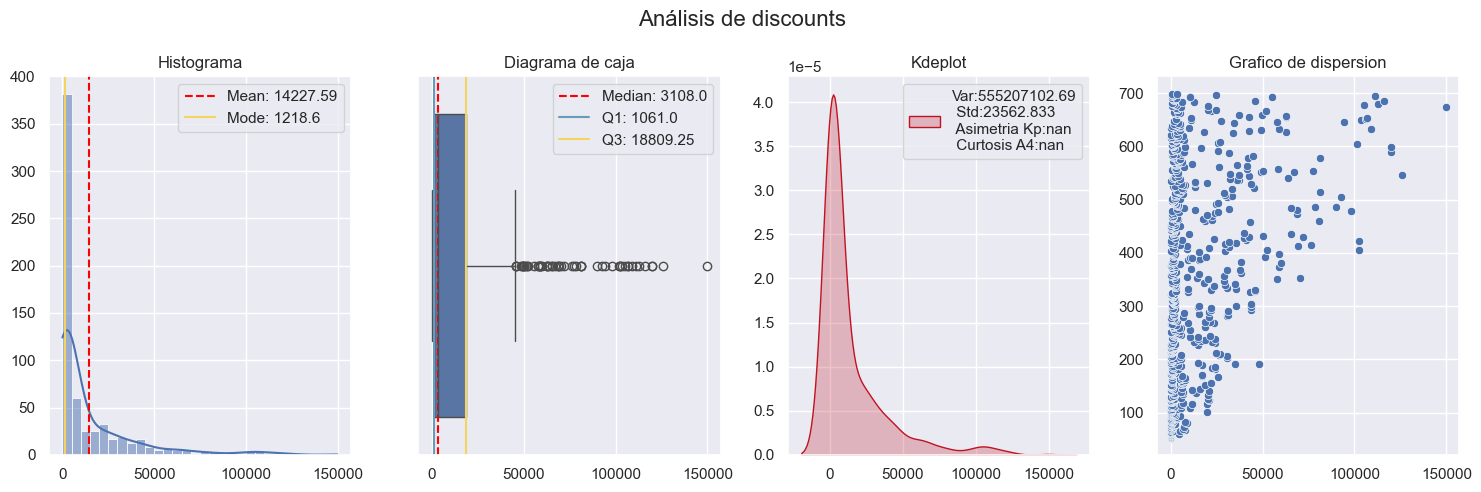

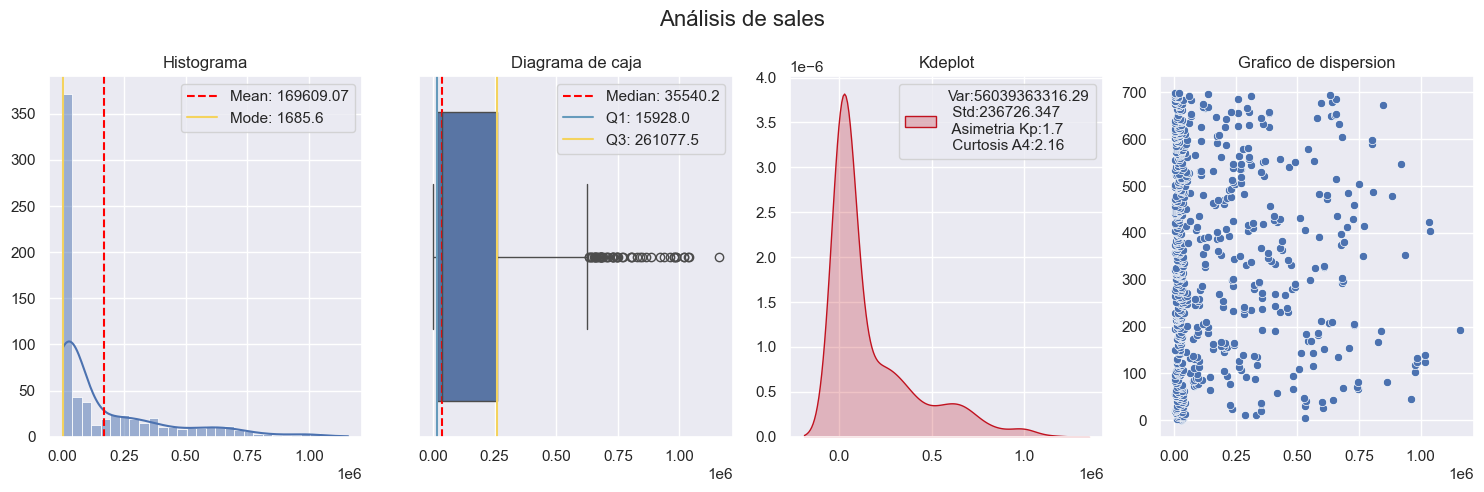

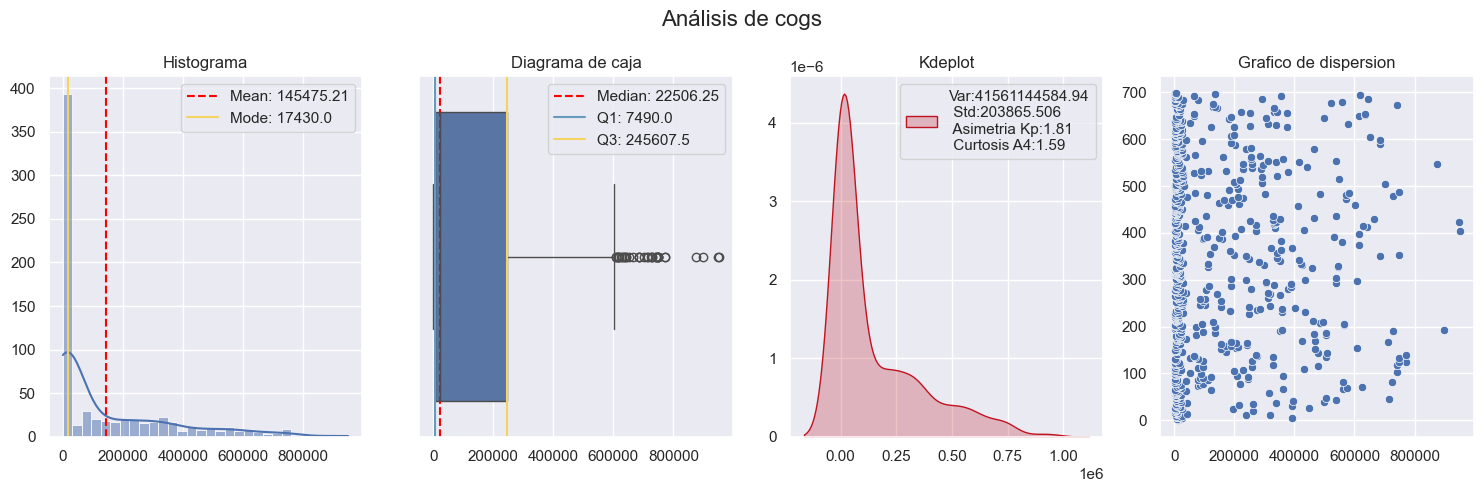

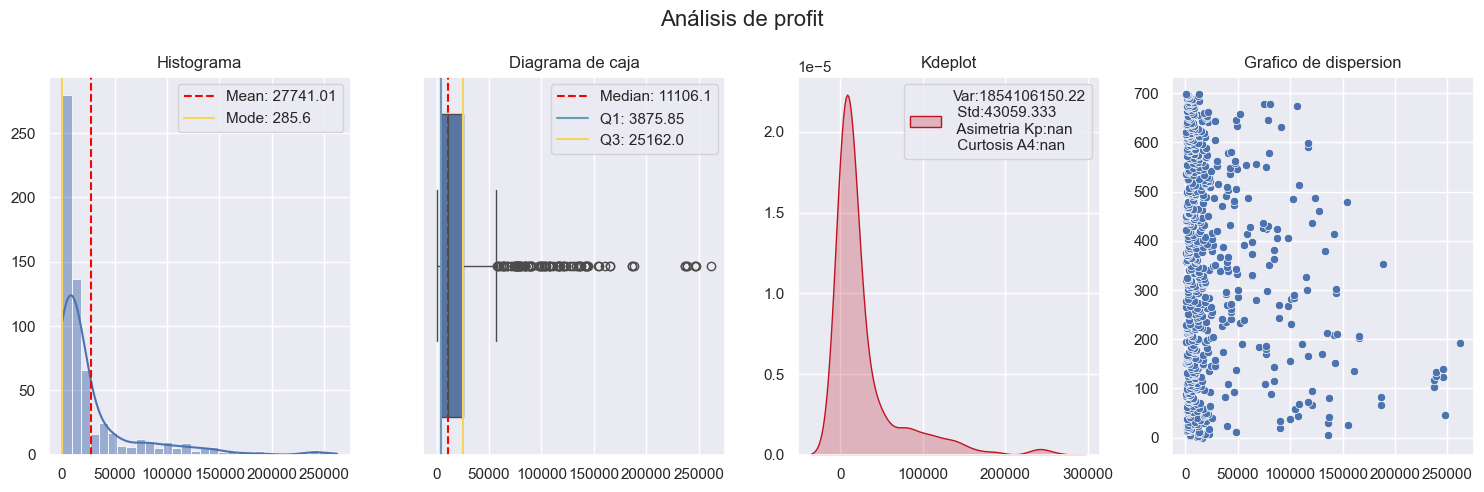

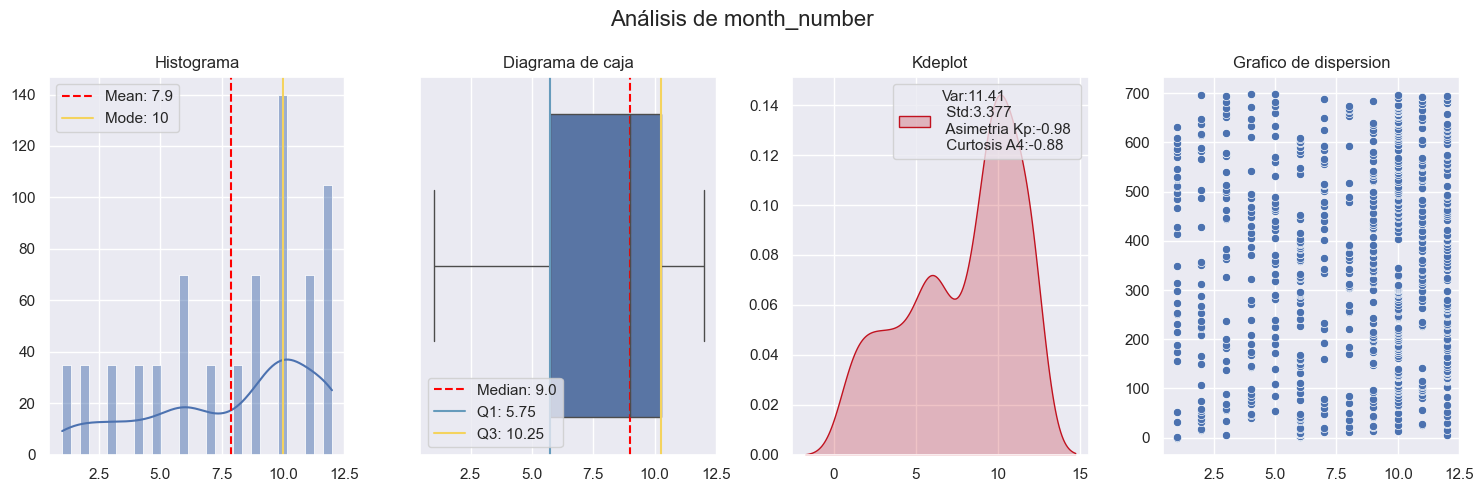

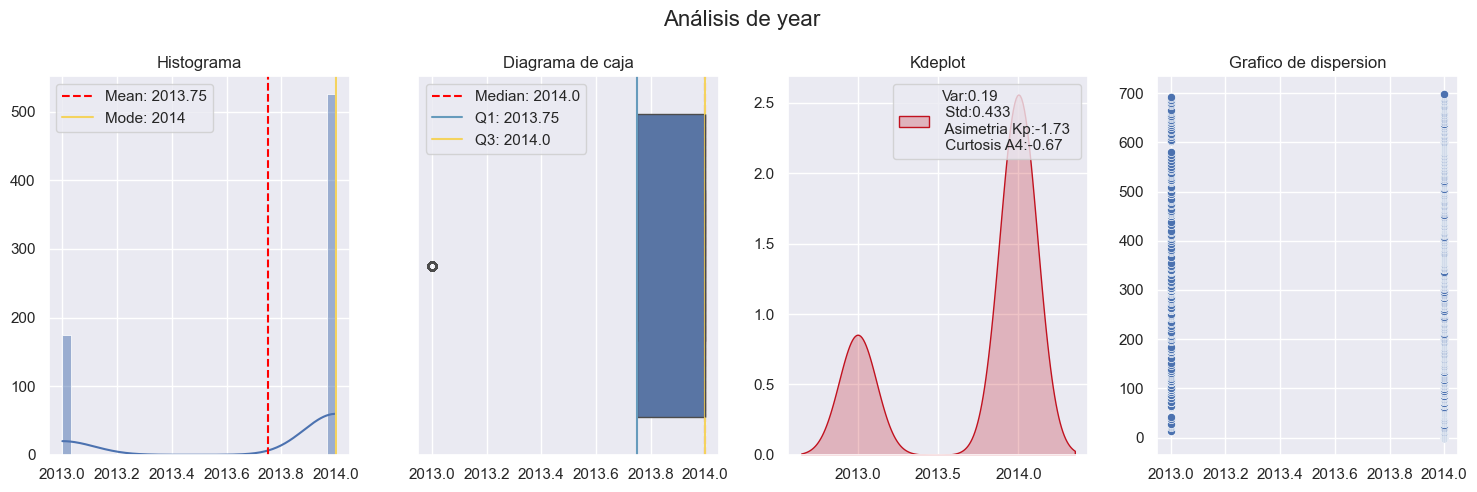

In [50]:

data_numeric_ =  pd.DataFrame(data_numeric)
analyze_data(data_numeric_)

### Analisis Bivariado

#### Analisis de datos numericos

In [5]:
print(cat_col)
print(num_col)

['segment', 'country', 'product', 'discount_band', 'month_name']
['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'year']


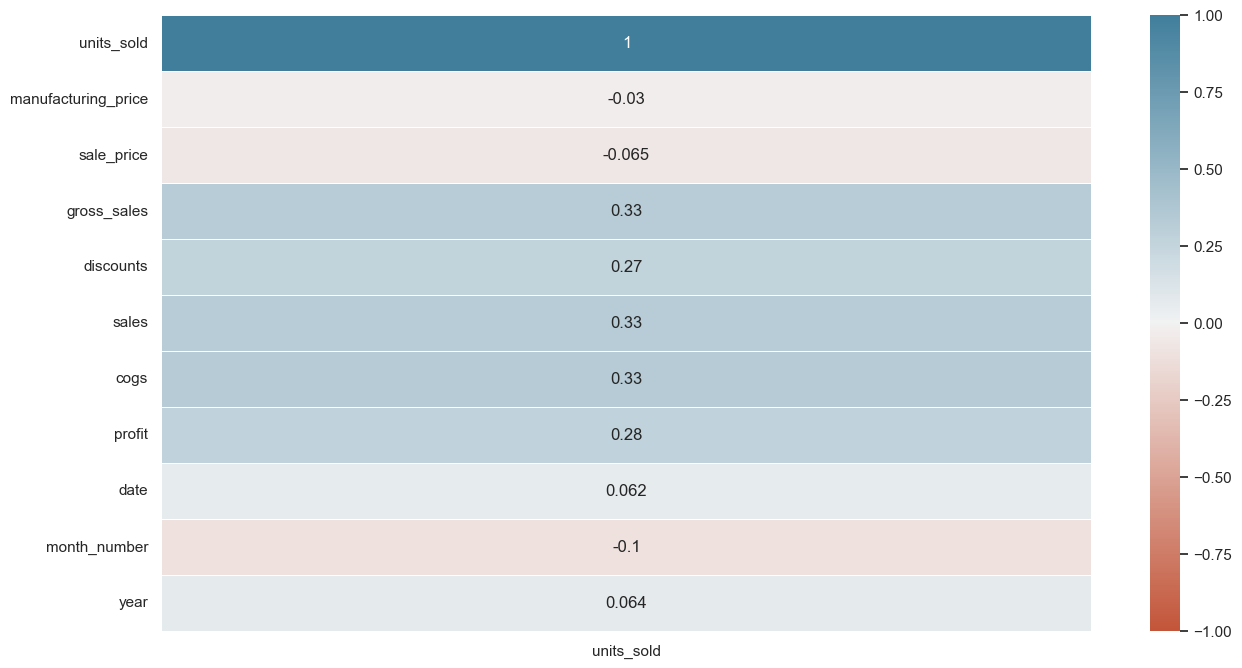

In [7]:
data_numeric = data.select_dtypes(exclude="object")
corr_matrix = data_numeric.corr()

# Seleccionar la columna de 'units_sold' y convertirla a un DataFrame
corr = corr_matrix[["units_sold"]]

# Configurar la figura del heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    data=corr,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

plt.show()

In [10]:
def calcular_correlacion(data):
    
    # Calcular la correlación de Pearson para cada variable
    correlaciones = data.corr()["units_sold"].drop(labels=["units_sold"])
    df_correlacion = pd.DataFrame(correlaciones)
    
    # Crear un DataFrame con los resultados
    
    # Clasificar la correlación
    def clasificar_correlacion(r):
        if r == 1 or r == -1:
            return 'Correlación perfecta'
        elif 0.9 < r <= 1 or -1 <= r < -0.9:
            return 'Correlación excelente'
        elif 0.8 < r <= 0.9 or -0.9 < r <= -0.8:
            return 'Correlación aceptable'
        elif 0.6 < r <= 0.8 or -0.8 < r <= -0.6:
            return 'Correlación regular'
        elif 0.3 < r <= 0.6 or -0.6 < r <= -0.3:
            return 'Correlación mínima'
        else:
            return 'No hay correlación'

    df_correlacion['Clasificacion/Sperman'] = df_correlacion['units_sold'].apply(clasificar_correlacion)
    
    # Ordenar el DataFrame de mayor a menor correlación absoluta
    df_correlacion = df_correlacion.reindex(df_correlacion['units_sold'].abs().sort_values(ascending=False).index)
    
    return df_correlacion

In [11]:
calcular_correlacion(data_numeric)

units_sold Clasificacion/Sperman
cogs                   0.331694    Correlación mínima
gross_sales            0.327221    Correlación mínima
sales                  0.326914    Correlación mínima
profit                 0.279973    No hay correlación
discounts              0.266142    No hay correlación
month_number          -0.103607    No hay correlación
sale_price            -0.065066    No hay correlación
year                   0.063857    No hay correlación
date                   0.062201    No hay correlación
manufacturing_price   -0.029644    No hay correlación

In [12]:
def plot_scatterplot(df, features, title='Features', columns=2, x_lim=None):
    df = df.copy()
    rows = math.ceil(len(features) / columns)
    
    fig, axes = plt.subplots(rows, columns, sharey=True, figsize=(14, 14))
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i + 1)
        correlation = df[feature].corr(df['units_sold'])
        r_squared = correlation ** 2
        sns.scatterplot(data=df, x=feature, y='units_sold', ax=ax,
                        label = f"corr = {round(correlation, 2)} \n r^2 = {round(r_squared, 2)}")

    
    fig.suptitle(f'{title} x units_sold', fontsize=25, x=0.56)
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    
    plt.show()

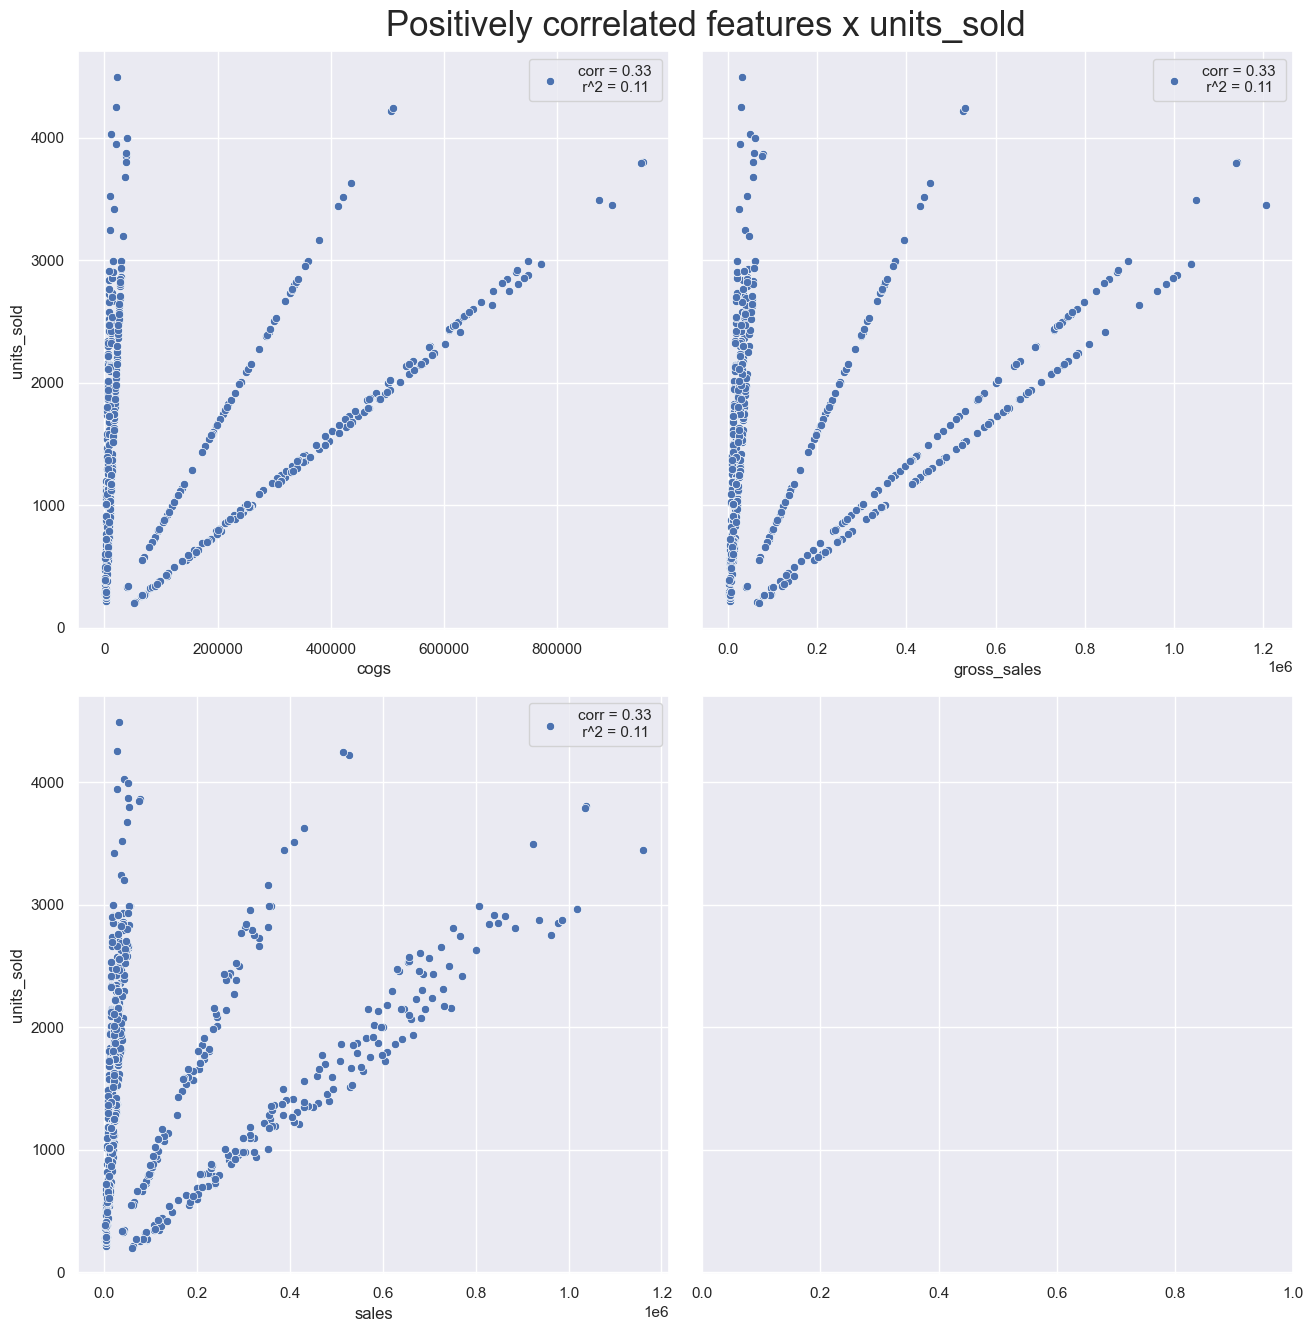

In [13]:
#Plot units_sold  x positively correlated features
pos_correlated_features = ['cogs','gross_sales', 'sales']

title = 'Positively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

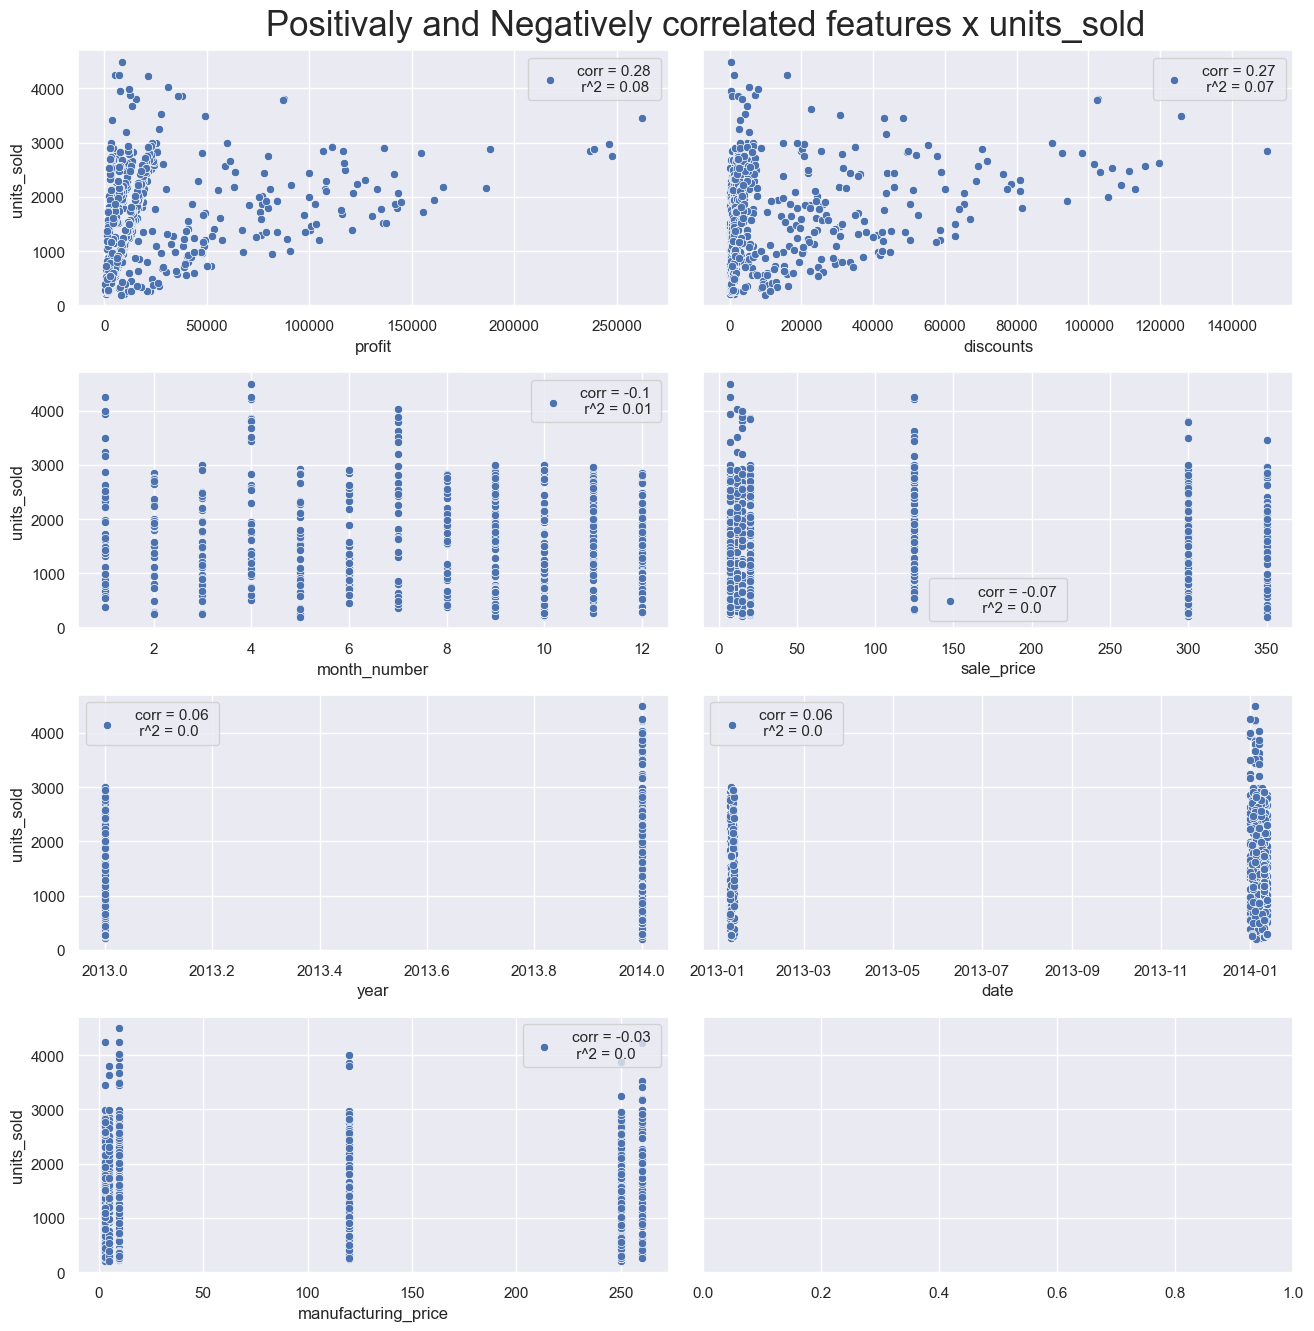

In [14]:
#Plot units_sold x positively correlated features and negatively correlated features
pos_correlated_features = ["profit","discounts", "month_number", "sale_price","year","date","manufacturing_price"]

title = 'Positivaly and Negatively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

#### Analisis de variables categoricas

In [15]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

Analizaremos cada variable categorica en base a discount_band

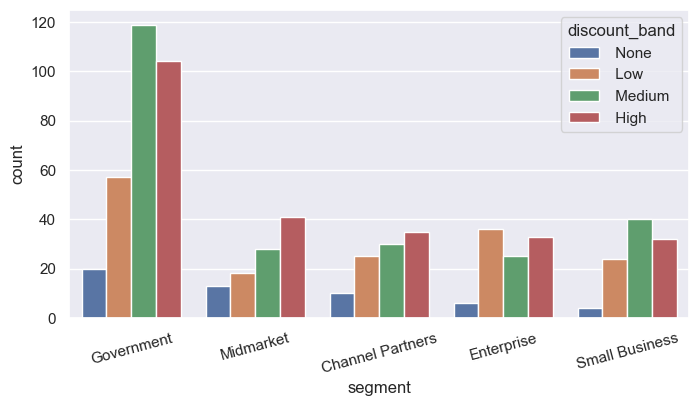

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "segment", hue = "discount_band", order = data["segment"].value_counts().index)
plt.xticks(rotation=15)
plt.show()

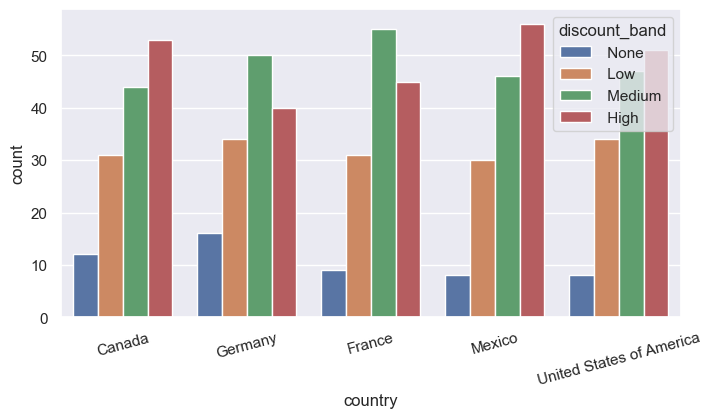

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "country", hue = "discount_band", order = data["country"].value_counts().index)
plt.xticks(rotation=15)
plt.show()

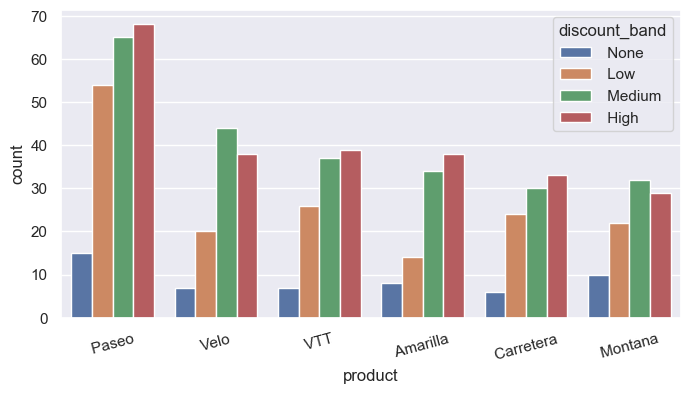

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "product", hue = "discount_band", order = data["product"].value_counts().index)
plt.xticks(rotation=15)
plt.show()

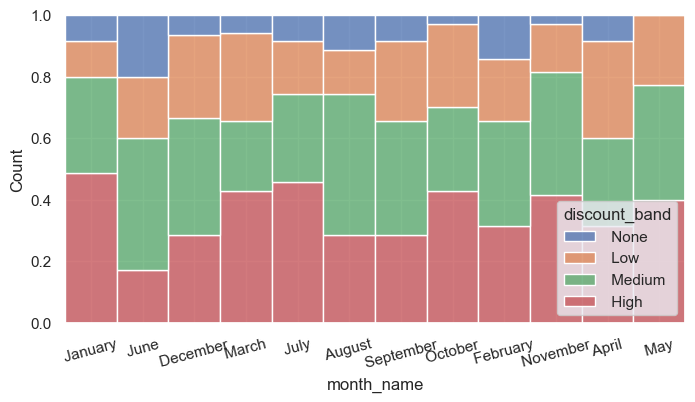

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(data= data, x = "month_name", hue = "discount_band",multiple="fill")
plt.xticks(rotation=15)
plt.show()

### Análisis de variables mixtas (numericas y categoricas)

#### Analisis de la variable dependiente en funcion de una solo variable categorica

In [6]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

Variable dependiente en funcion de segment

In [7]:
data["segment"].value_counts()

segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64

In [57]:
government = data.loc[data["segment"]=="Government"].copy()
midmarket = data.loc[data["segment"]=="Midmarket"].copy()
channel = data.loc[data["segment"] == "Channel Partners"].copy()
enterprise = data.loc[data["segment"] == "Enterprise"].copy()
small_business = data.loc[data["segment"] == "Small Business"].copy()
segments = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]

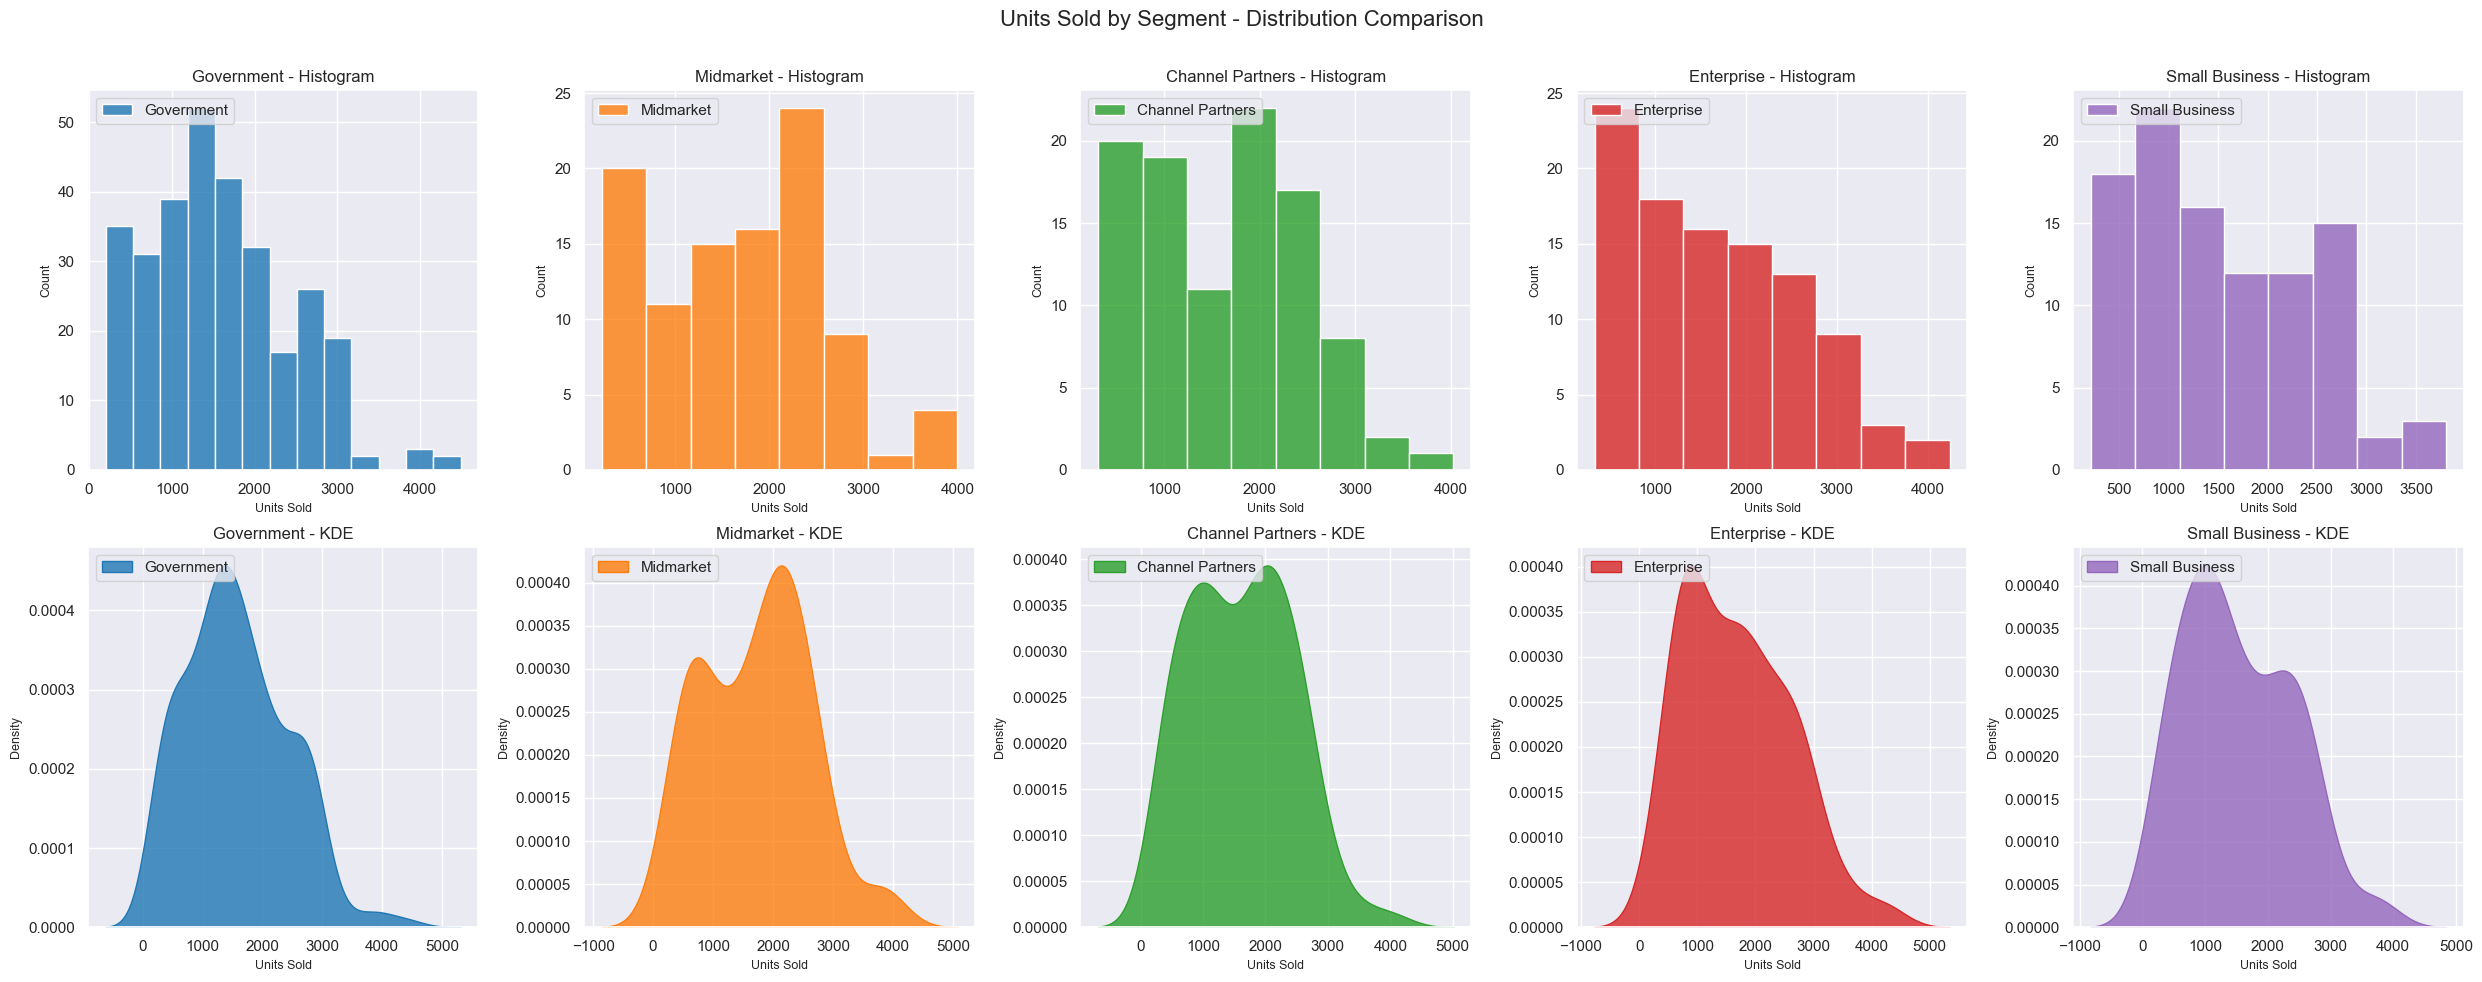

In [6]:
# Función para generar gráficos comparativos
def plot_grouped_distributions(data, group_column, target_column, group_values, colors, x_label, title_prefix, xlim=None):
    
    
    n_groups = len(group_values)  # Cantidad de grupos a analizar
    
    plt.figure(figsize=(5 * n_groups, 10))  # Ajusta el tamaño de la figura dinámicamente según los grupos
    
    # Histograma - Fila 1
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group].copy()
        plt.subplot(2, n_groups, i + 1)  # Subplot para la fila de histogramas
        sns.histplot(group_data[target_column], label=group, fill=True, color=colors[i], alpha=0.8)
        plt.title(f"{group} - Histogram")
        plt.xlabel(x_label, fontsize=9)
        plt.ylabel("Count", fontsize=9)
        if xlim:
            plt.xlim(xlim)
        plt.legend(loc="upper left")
    
    # KDE - Fila 2
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group].copy()
        plt.subplot(2, n_groups, n_groups + i + 1)  # Subplot para la fila de KDE
        sns.kdeplot(group_data[target_column], label=group, fill=True, color=colors[i], alpha=0.8)
        plt.title(f"{group} - KDE")
        plt.xlabel(x_label, fontsize=9)
        plt.ylabel("Density", fontsize=9)
        if xlim:
            plt.xlim(xlim)
        plt.legend(loc="upper left")
    
    plt.tight_layout()  # Ajusta los elementos de la gráfica para que no se superpongan
    plt.suptitle(f"{title_prefix} - Distribution Comparison", fontsize=16)  # Título general
    plt.subplots_adjust(top=0.9)  # Ajusta el espacio para el título general
    plt.show()

# Ejemplo 1: Uso para los segmentos 'segment'
segment_values = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plot_grouped_distributions(data, group_column="segment", target_column="units_sold", group_values=segment_values, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by Segment")


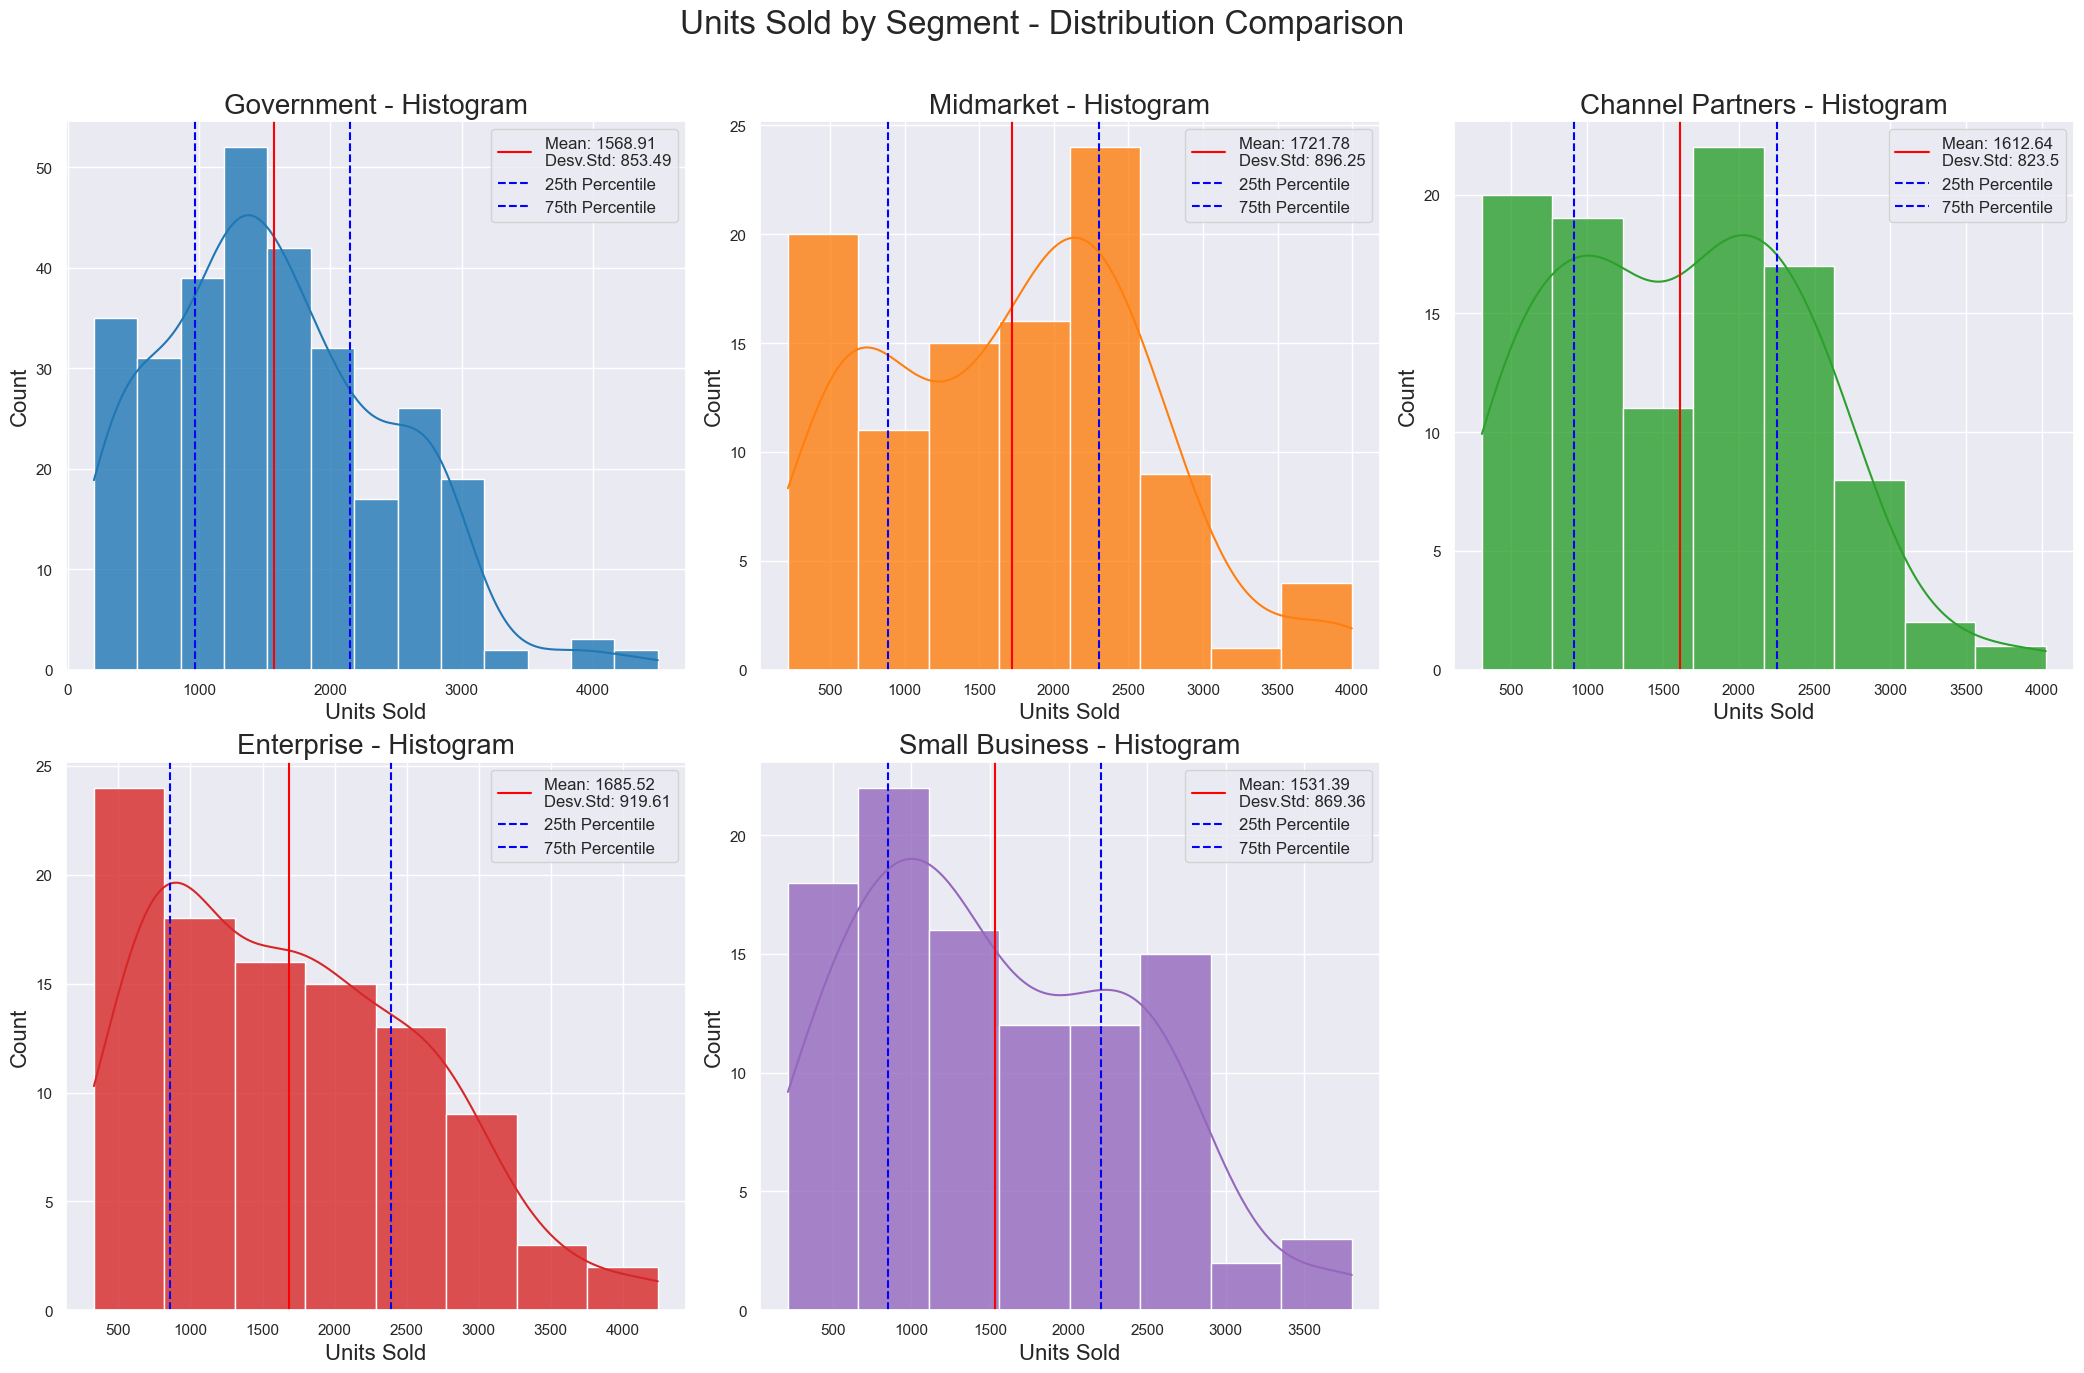

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para generar gráficos comparativos
def plot_grouped_distributions_2(data, group_column, target_column, group_values, colors, x_label, title_prefix, xlim=None):
    
    n_groups = len(group_values)  # Cantidad de grupos a analizar
    
    # Determinamos el número de filas (una para los primeros 3 gráficos, otra para el resto)
    n_cols = 3  # Número de gráficos por fila
    n_rows = (n_groups + n_cols - 1) // n_cols  # Calcula el número de filas necesarias

    plt.figure(figsize=(7 * n_cols, 7 * n_rows))  # Ajusta el tamaño de la figura dinámicamente según los grupos
    
    # Histograma - Ajuste en la cuadrícula 2 filas
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group].copy()
        plt.subplot(n_rows, n_cols, i + 1)  # Subplot organizado en filas y columnas
        sns.histplot(group_data[target_column], fill=True, color=colors[i], alpha=0.8, kde=True)
        plt.title(f"{group} - Histogram", fontsize=20)
        plt.xlabel(x_label, fontsize=16)
        plt.ylabel("Count", fontsize=16)
        if xlim:
            plt.xlim(xlim)
        
        # Añadir líneas verticales para la media y los percentiles
        mean = group_data[target_column].mean()
        desv_std = group_data[target_column].std()
        q25 = group_data[target_column].quantile(0.25)
        q75 = group_data[target_column].quantile(0.75)
        
        plt.axvline(x=mean, color="red", label=f"Mean: {round(mean, 2)}\nDesv.Std: {round(desv_std, 2)}")
        plt.axvline(x=q25, color="blue", linestyle="--", label="25th Percentile")
        plt.axvline(x=q75, color="blue", linestyle="--", label="75th Percentile")
        plt.legend(fontsize=12)
    
    plt.tight_layout()  # Ajusta los elementos de la gráfica para que no se superpongan
    plt.suptitle(f"{title_prefix} - Distribution Comparison", fontsize=24)  # Título general
    plt.subplots_adjust(top=0.9)  # Ajusta el espacio para el título general
    plt.show()

# Ejemplo 1: Uso para los segmentos 'segment'
segment_values = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','8c564b']

# Llamada a la función
plot_grouped_distributions_2(data, group_column="segment", target_column="units_sold", group_values=segment_values, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by Segment")


In [8]:

def plot_grouped_distributions_3(data, group_column, target_column, group_values=None, colors=None, 
                               x_label=None, title_prefix=None, plot_type="scatter"):
    """
    Función para graficar distribuciones agrupadas, flexible para diferentes columnas y tipos de gráficos.

    Parámetros:
    - data: DataFrame con los datos.
    - group_column: Columna que se usará para agrupar (categoría).
    - target_column: Columna que se usará para el valor en el gráfico (variable dependiente).
    - group_values: Lista de valores de los grupos en group_column (opcional).
    - colors: Lista de colores para cada grupo.
    - x_label: Etiqueta para el eje x.
    - title_prefix: Prefijo para el título del gráfico.
    - plot_type: Tipo de gráfico ("scatter" o "histogram").
    """
    # Configuración del tamaño de la figura
    plt.figure(figsize=(20, 6))
    
    # Configuración de valores predeterminados
    if group_values is None:
        group_values = data[group_column].unique()
    if colors is None or len(colors) < len(group_values):
        raise ValueError("Debes proporcionar una lista de colores con la misma longitud que los valores de segmentación.")
    if x_label is None:
        x_label = target_column
    if title_prefix is None:
        title_prefix = f"Distribución de {target_column} por {group_column}"
    
    # Subplot para el gráfico
    plt.subplot(1, 2, 1)
    
    # Bucle para iterar sobre los grupos y graficar
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group]
        
        if plot_type == "scatter":
            sns.scatterplot(x=group_data[target_column], y=group_data.index, 
                            label=group, color=colors[i], alpha=0.8)
        elif plot_type == "histogram":
            sns.histplot(group_data[target_column], label=group, color=colors[i], kde=True, alpha=0.5)
        else:
            raise ValueError("plot_type debe ser 'scatter' o 'histogram'")
    
    # Personalización del gráfico
    plt.legend(loc="upper left")
    plt.ylabel("Index" if plot_type == "scatter" else "Frequency", fontsize=9)
    plt.xlabel(x_label, fontsize=9)
    plt.title(title_prefix)
    
    # Mostrar gráfico
    plt.show()


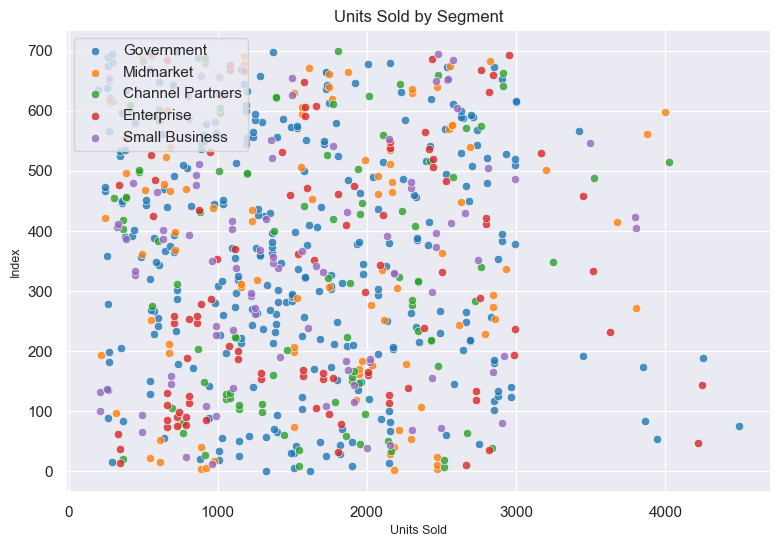

In [22]:
plot_grouped_distributions_3(data, group_column="segment", target_column="units_sold", 
                           group_values=segment_values, colors=colors, 
                           x_label="Units Sold", title_prefix="Units Sold by Segment", 
                           plot_type="scatter")

Variable dependiente en funcion de country

In [61]:
data["country"].value_counts()

country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64

In [21]:
Canada = data.loc[data["country"]=="Canada"].copy()
Germany = data.loc[data["country"]=="Germany"].copy()
France = data.loc[data["country"] == "France"].copy()
Mexico = data.loc[data["country"] == "Mexico"].copy()
United_States_of_America = data.loc[data["country"] == "United States of America"].copy()
countrys = ["Canada", "Germany", "France", "Mexico", "United States of America"]

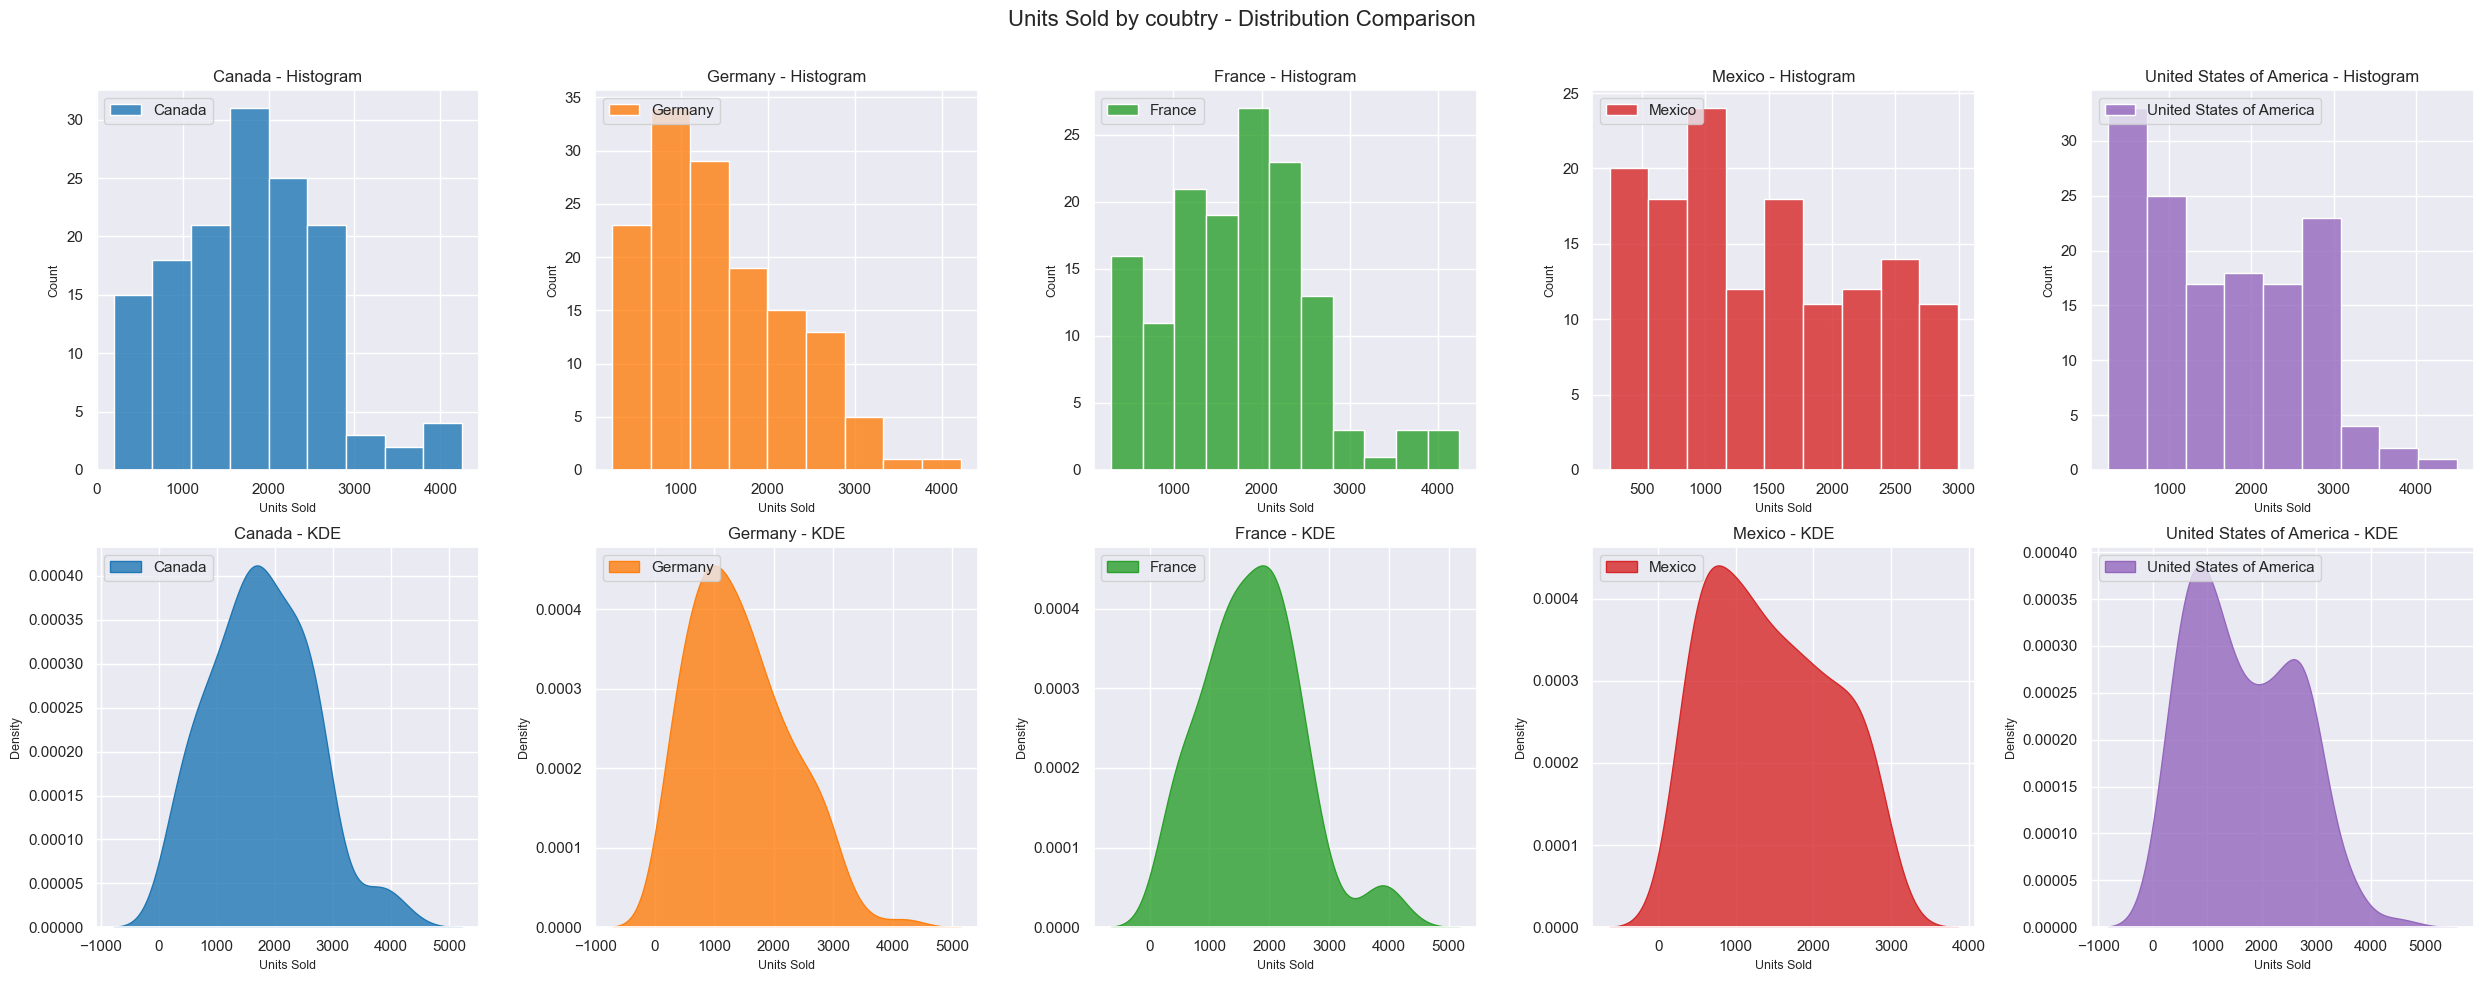

In [11]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plot_grouped_distributions(data, group_column="country", target_column="units_sold", group_values=countrys, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by coubtry")

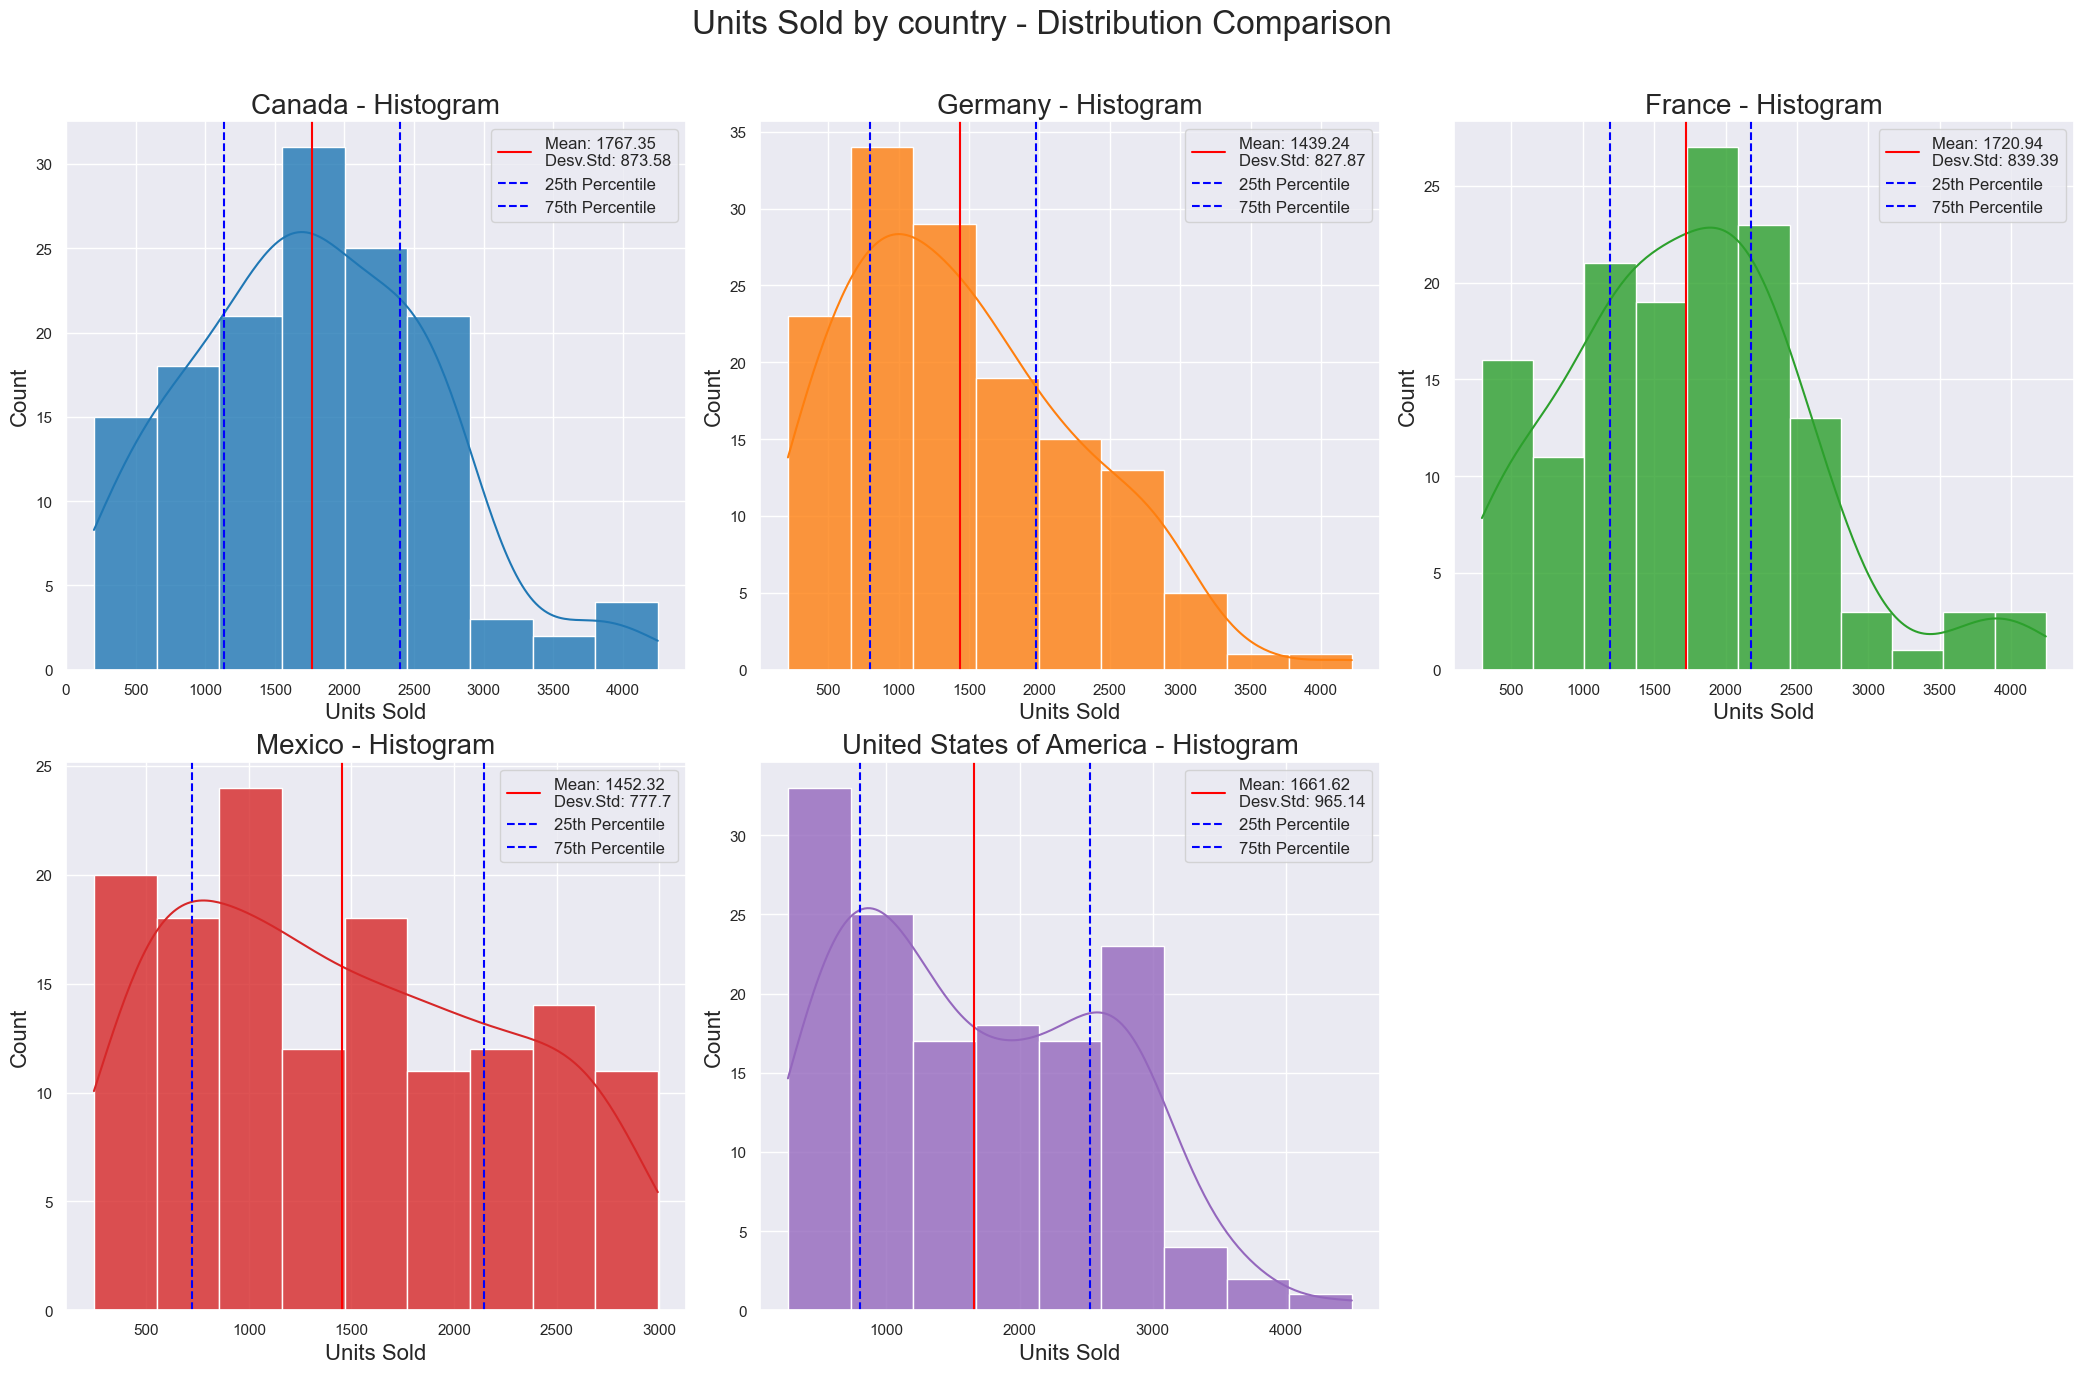

In [14]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Llamada a la función
plot_grouped_distributions_2(data, group_column="country", target_column="units_sold", group_values=countrys, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by country")

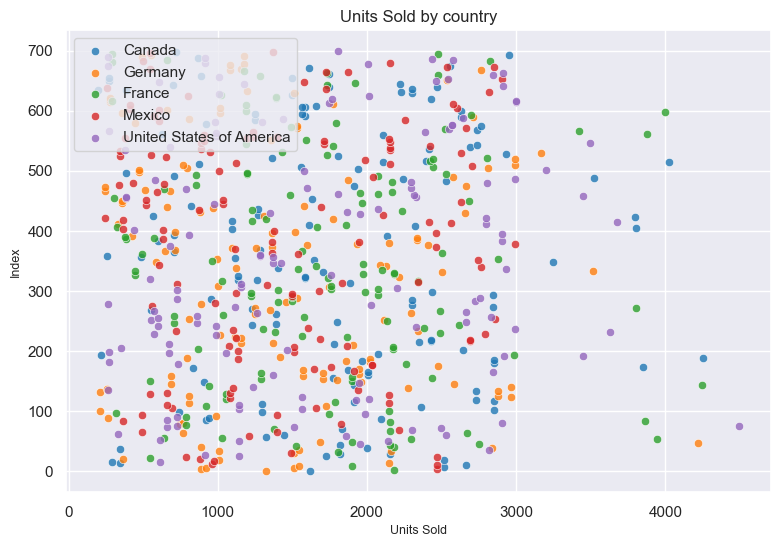

In [20]:
plot_grouped_distributions_3(data, group_column="country", target_column="units_sold", 
                           group_values=countrys, colors=colors, 
                           x_label="Units Sold", title_prefix="Units Sold by country", 
                           plot_type="scatter")

Variable dependiente en funcion de product

In [26]:
data["product"].value_counts()

product
Paseo         202
Velo          109
VTT           109
Amarilla       94
Carretera      93
Montana        93
Name: count, dtype: int64

In [44]:
data["product"].unique()

array([' Carretera ', ' Montana ', ' Paseo ', ' Velo ', ' VTT ',
       ' Amarilla '], dtype=object)

In [47]:
Paseo = data.loc[data["product"]==" Paseo "].copy()
Velo = data.loc[data["product"]==" Velo "].copy()
VTT = data.loc[data["product"] == " VTT "].copy()
Amarilla = data.loc[data["product"] == " Amarilla "].copy()
Carretera = data.loc[data["product"] == " Carretera "].copy()
Montana = data.loc[data["product"]== " Montana "].copy()
products = [" Paseo "," Velo ", " VTT ", " Amarilla ", " Carretera ", " Montana "]

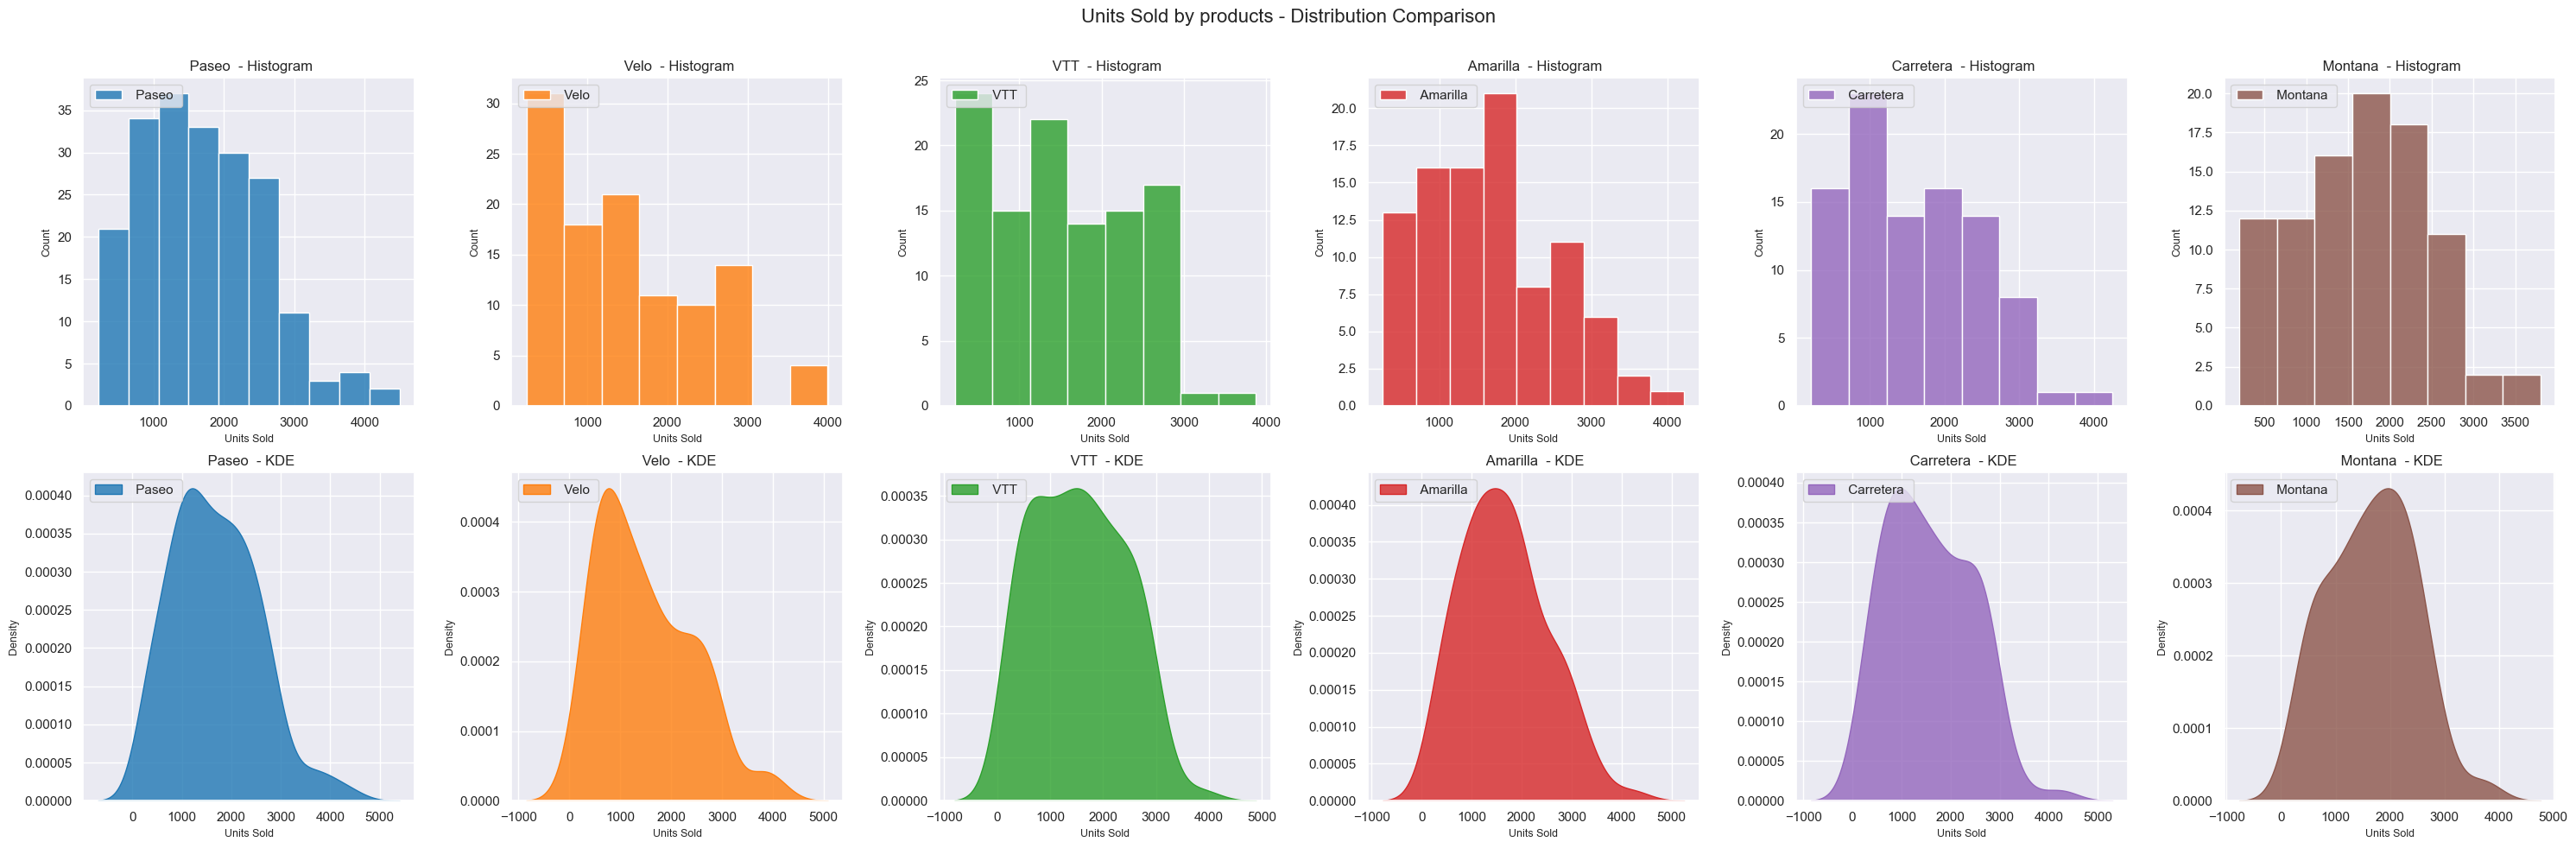

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plot_grouped_distributions(data, group_column="product", target_column="units_sold", group_values=products, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by products")

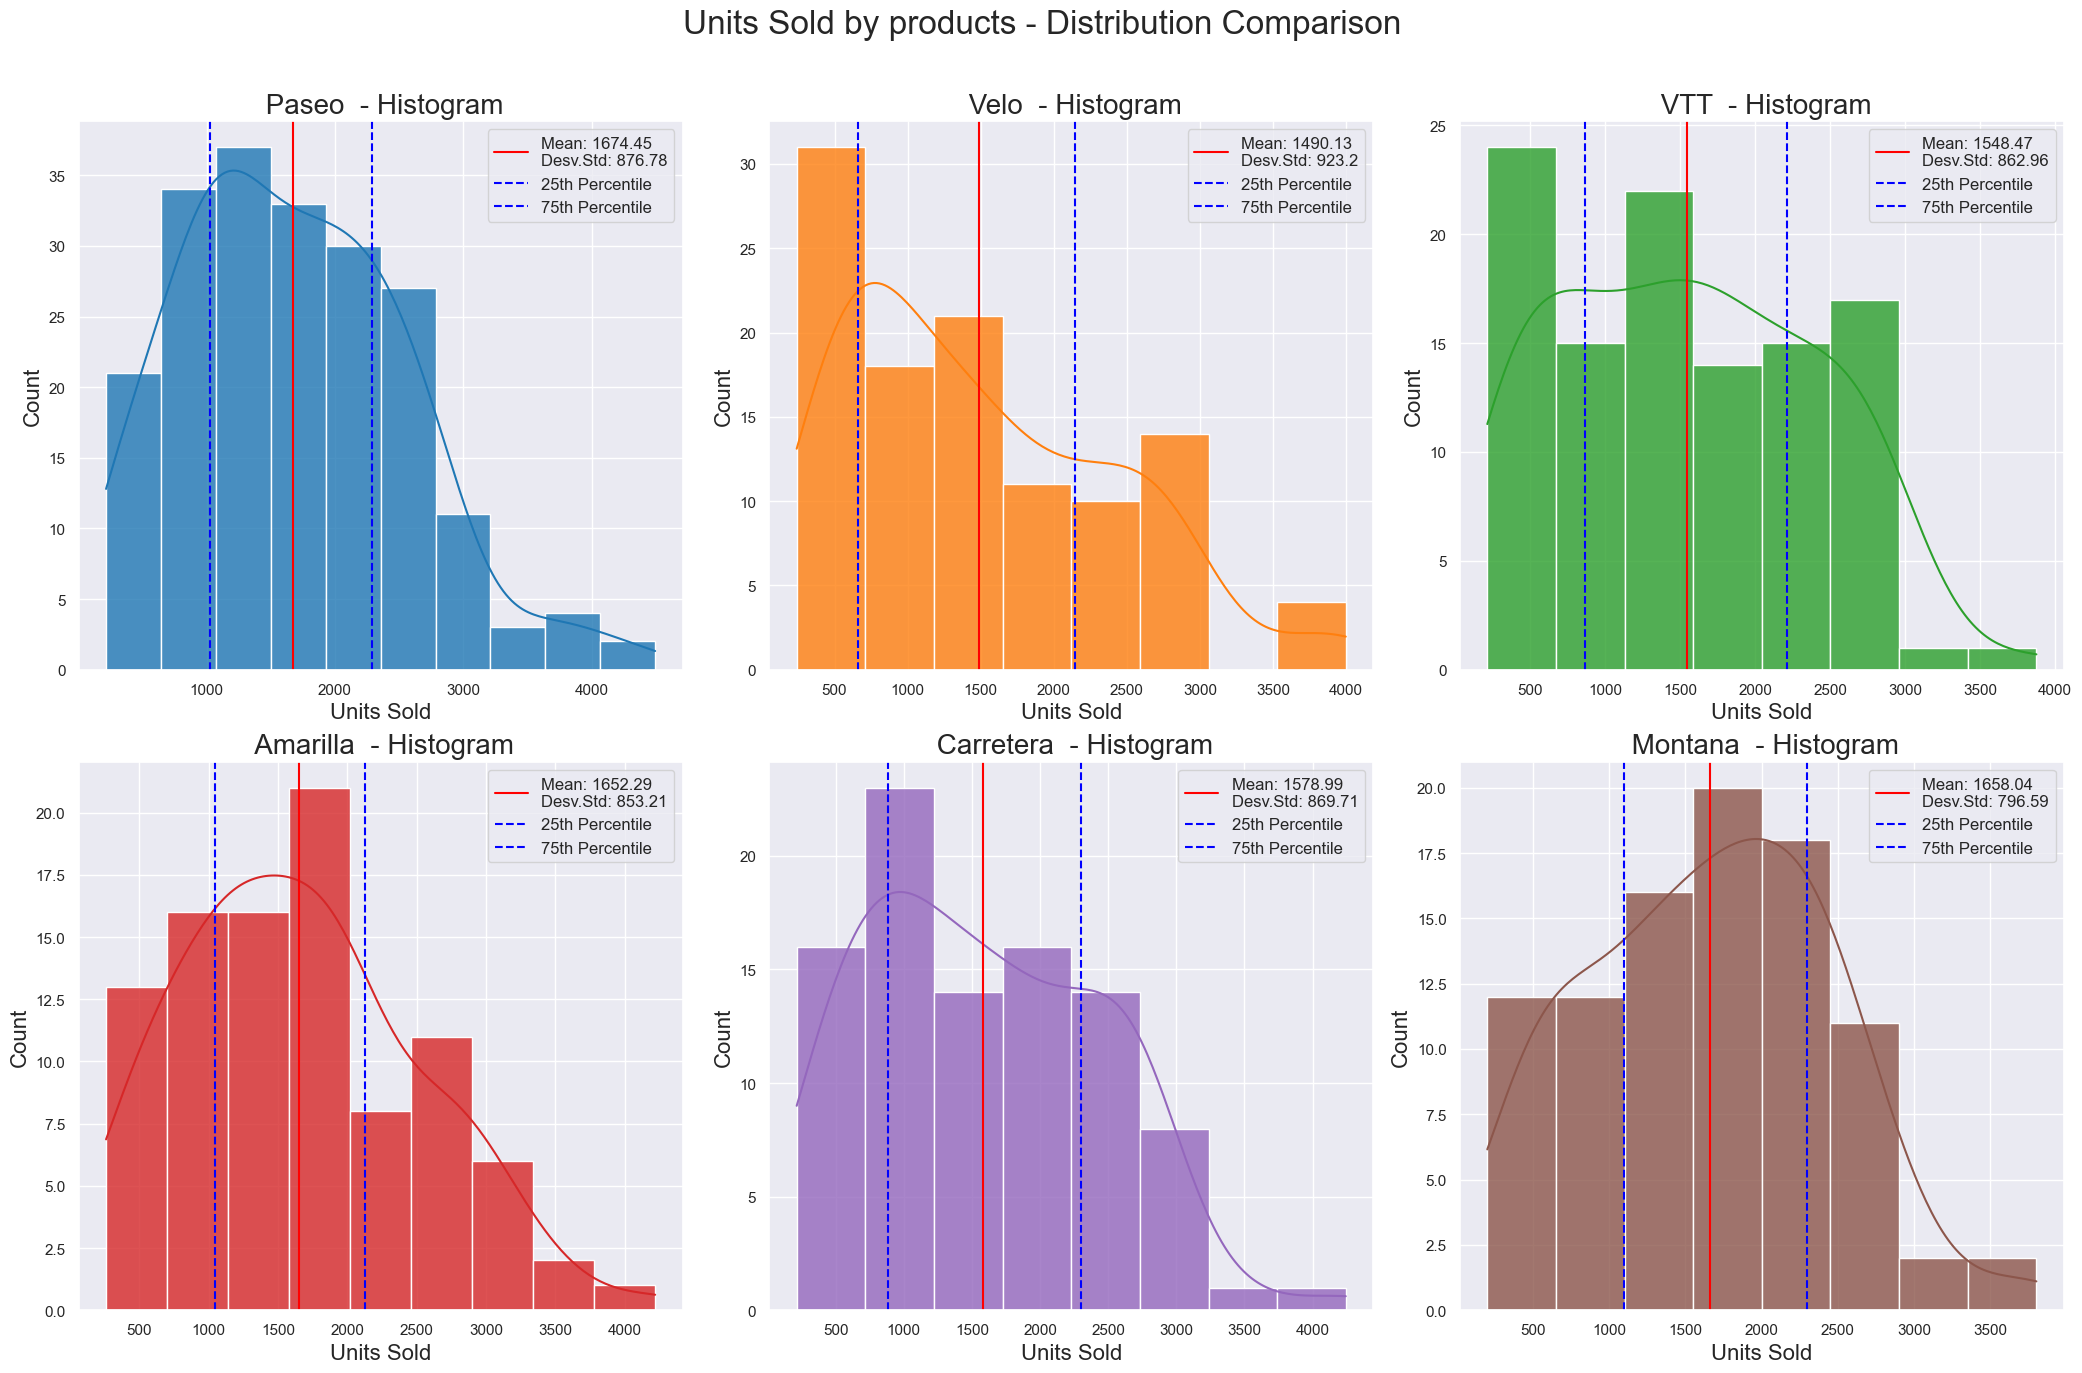

In [55]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',"#8c564b"]

# Llamada a la función
plot_grouped_distributions_2(data, group_column="product", target_column="units_sold", group_values=products, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by products")

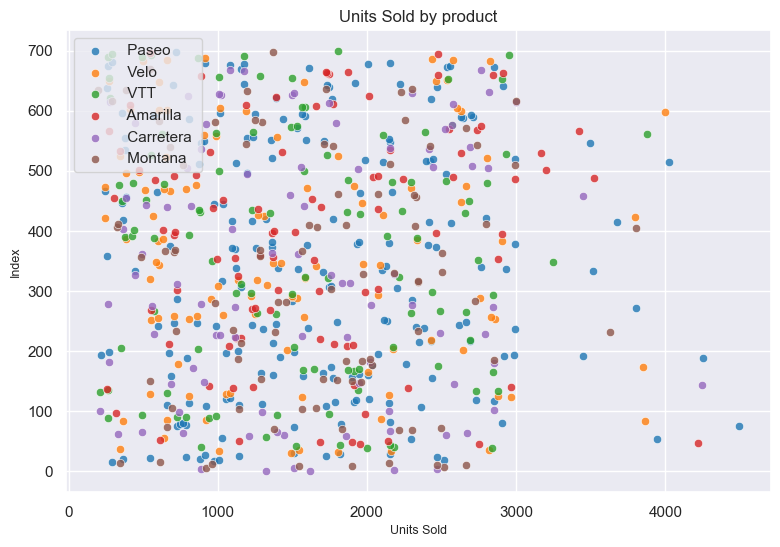

In [57]:
plot_grouped_distributions_3(data, group_column="product", target_column="units_sold", 
                           group_values=products, colors=colors, 
                           x_label="Units Sold", title_prefix="Units Sold by product", 
                           plot_type="scatter")

Variable dependiende en funcion de discount_band

In [58]:
data["discount_band"].value_counts()

discount_band
High       245
Medium     242
Low        160
None        53
Name: count, dtype: int64

In [59]:
data["discount_band"].unique()

array([' None ', ' Low ', ' Medium ', ' High '], dtype=object)

In [70]:
Nene = data.loc[data["discount_band"]==" None "].copy()
Low = data.loc[data["discount_band"]==" Low "].copy()
Medium = data.loc[data["discount_band"] == " Medium "].copy()
High = data.loc[data["discount_band"] == " High "].copy()
discount_bands = [" None ", " Low ", " Medium ", " High "]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

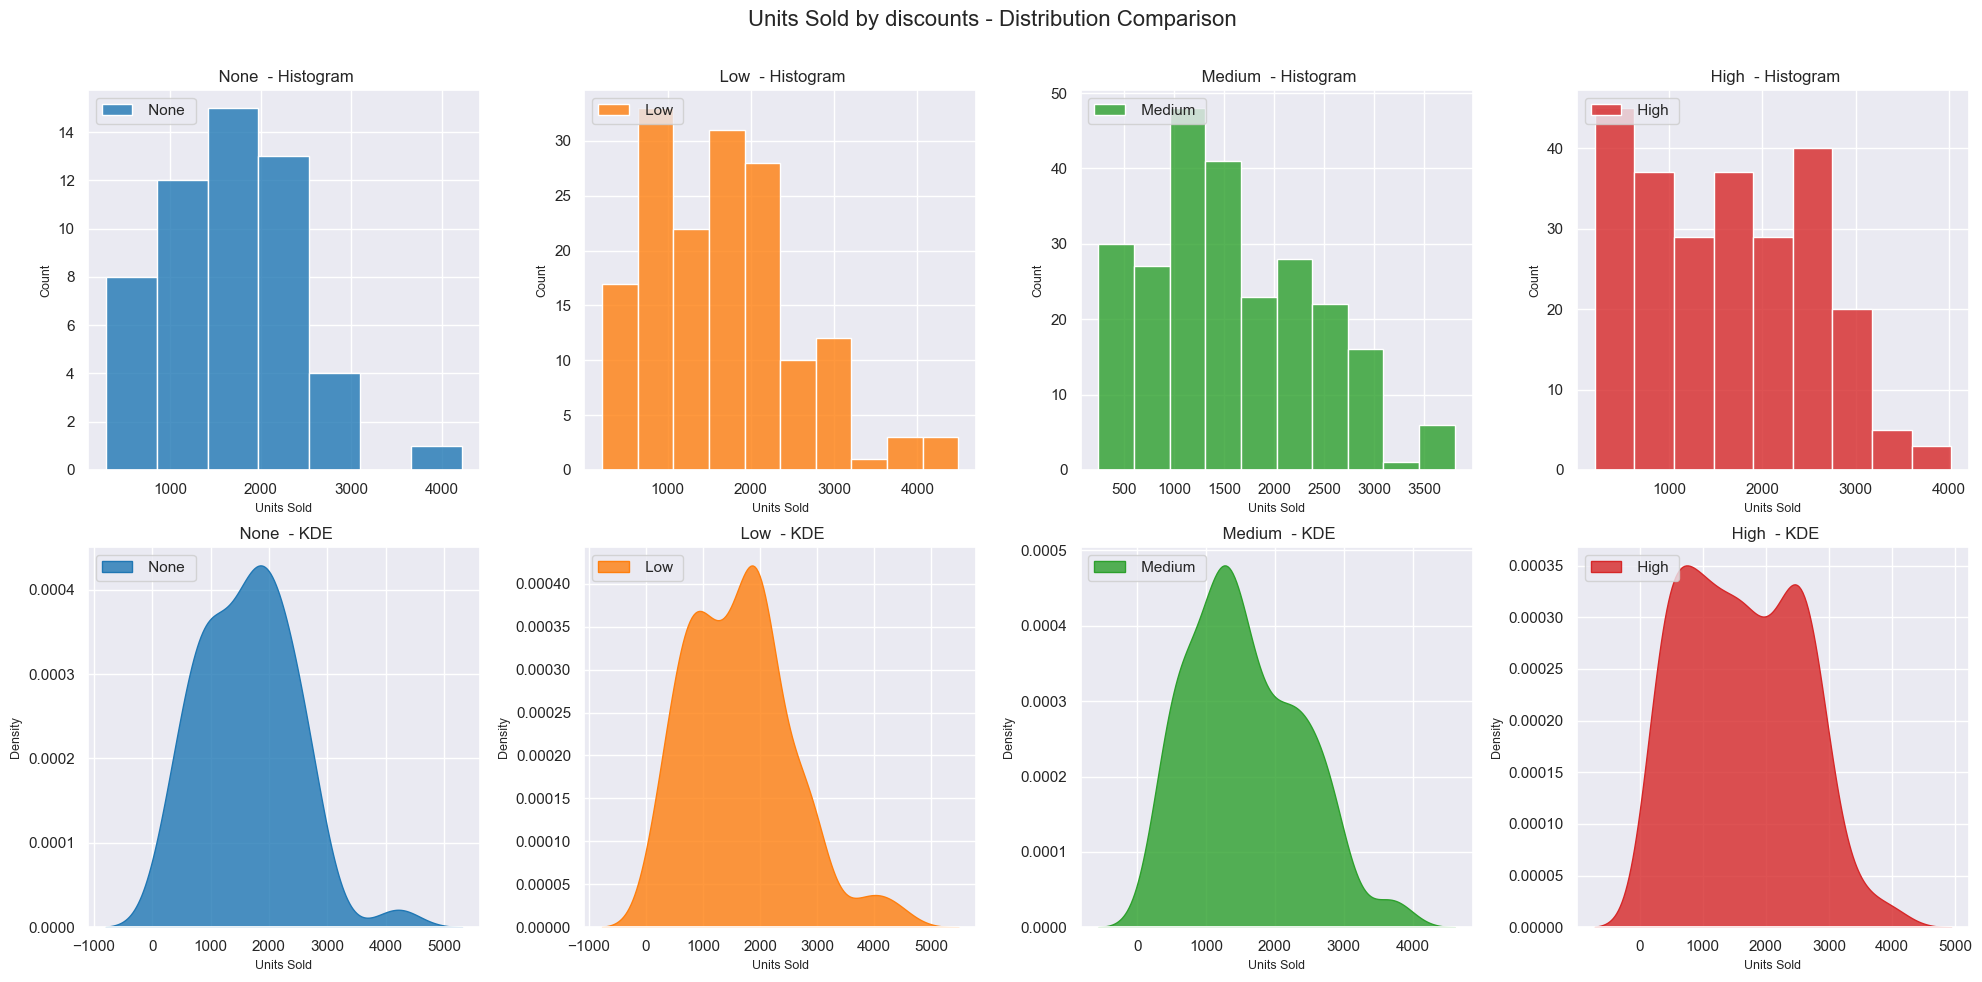

In [71]:
plot_grouped_distributions(data, group_column="discount_band", target_column="units_sold", group_values=discount_bands, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by discounts")

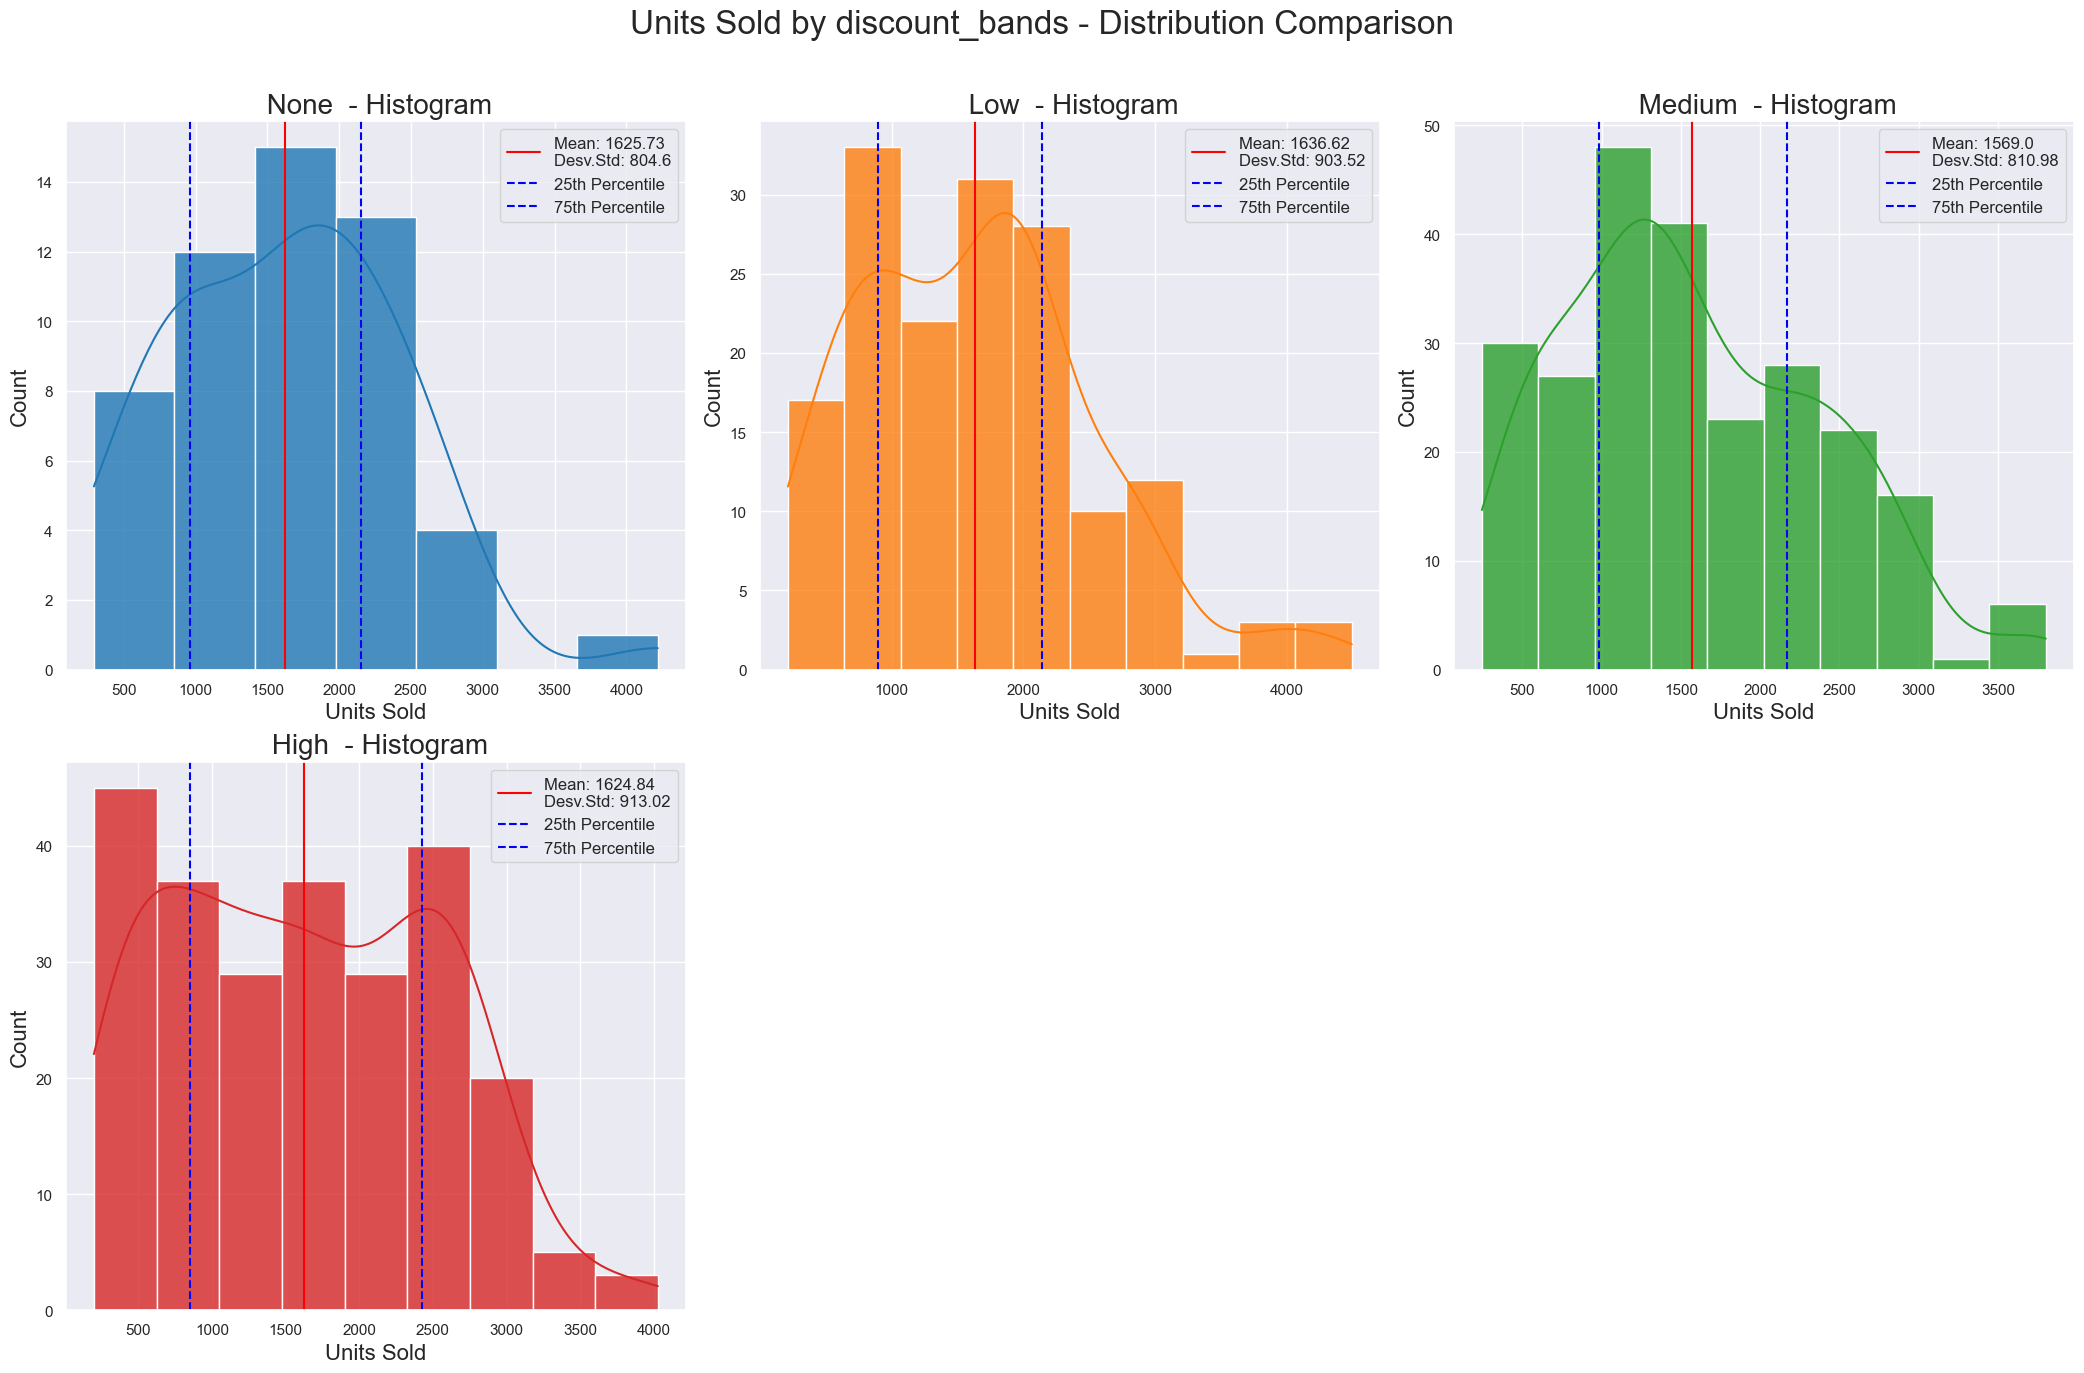

In [72]:
plot_grouped_distributions_2(data, group_column="discount_band", target_column="units_sold", group_values=discount_bands, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by discount_bands")

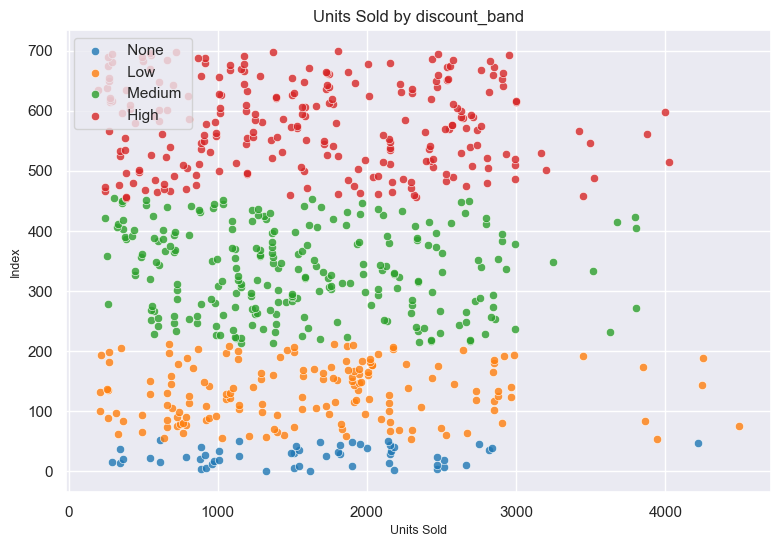

In [73]:
plot_grouped_distributions_3(data, group_column="discount_band", target_column="units_sold", 
                           group_values=discount_bands, colors=colors, 
                           x_label="Units Sold", title_prefix="Units Sold by discount_band", 
                           plot_type="scatter")

Variable dependiente en funcion dee month_name

In [74]:
data["month_name"].value_counts()

month_name
October       140
December      105
June           70
September      70
November       70
January        35
March          35
July           35
August         35
February       35
April          35
May            35
Name: count, dtype: int64

In [75]:
data["month_name"].unique()

array([' January ', ' June ', ' December ', ' March ', ' July ',
       ' August ', ' September ', ' October ', ' February ', ' November ',
       ' April ', ' May '], dtype=object)

In [80]:
January = data.loc[data["month_name"] == " January "].copy()
June = data.loc[data["month_name"] == " June "].copy()
December = data.loc[data["month_name"] == " December "].copy()
March = data.loc[data["month_name"] == " March "].copy()
July = data.loc[data["month_name"] == " July "].copy()  
August = data.loc[data["month_name"] == " August "].copy()
September = data.loc[data["month_name"] == " September "].copy()
October = data.loc[data["month_name"] == " October "].copy()
November = data.loc[data["month_name"] == " November "].copy()
February = data.loc[data["month_name"] == " February "].copy()
month_names = [" January ", " June ", " December ", " March ", " July ", " August ", " September ", " October ", " February ", " November ", " April ", " May "]
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', 
    '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', 
    '#dbdb8d', '#9edae5', '#393b79', '#637939', '#e7ba52', '#8ca252', 
    '#b5cf6b', '#17becf', '#9edae5'
]

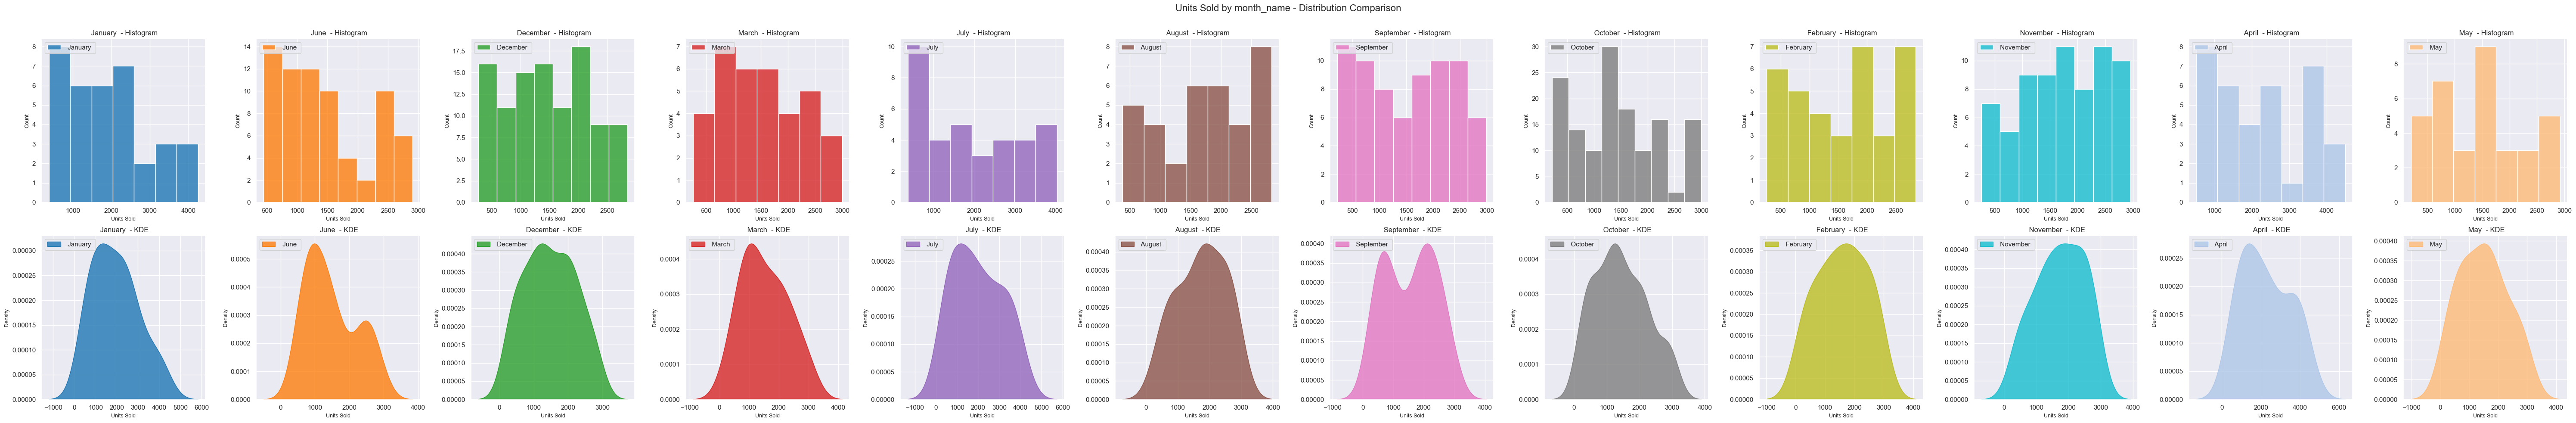

In [81]:
plot_grouped_distributions(data, group_column="month_name", target_column="units_sold", group_values=month_names, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by month_name")

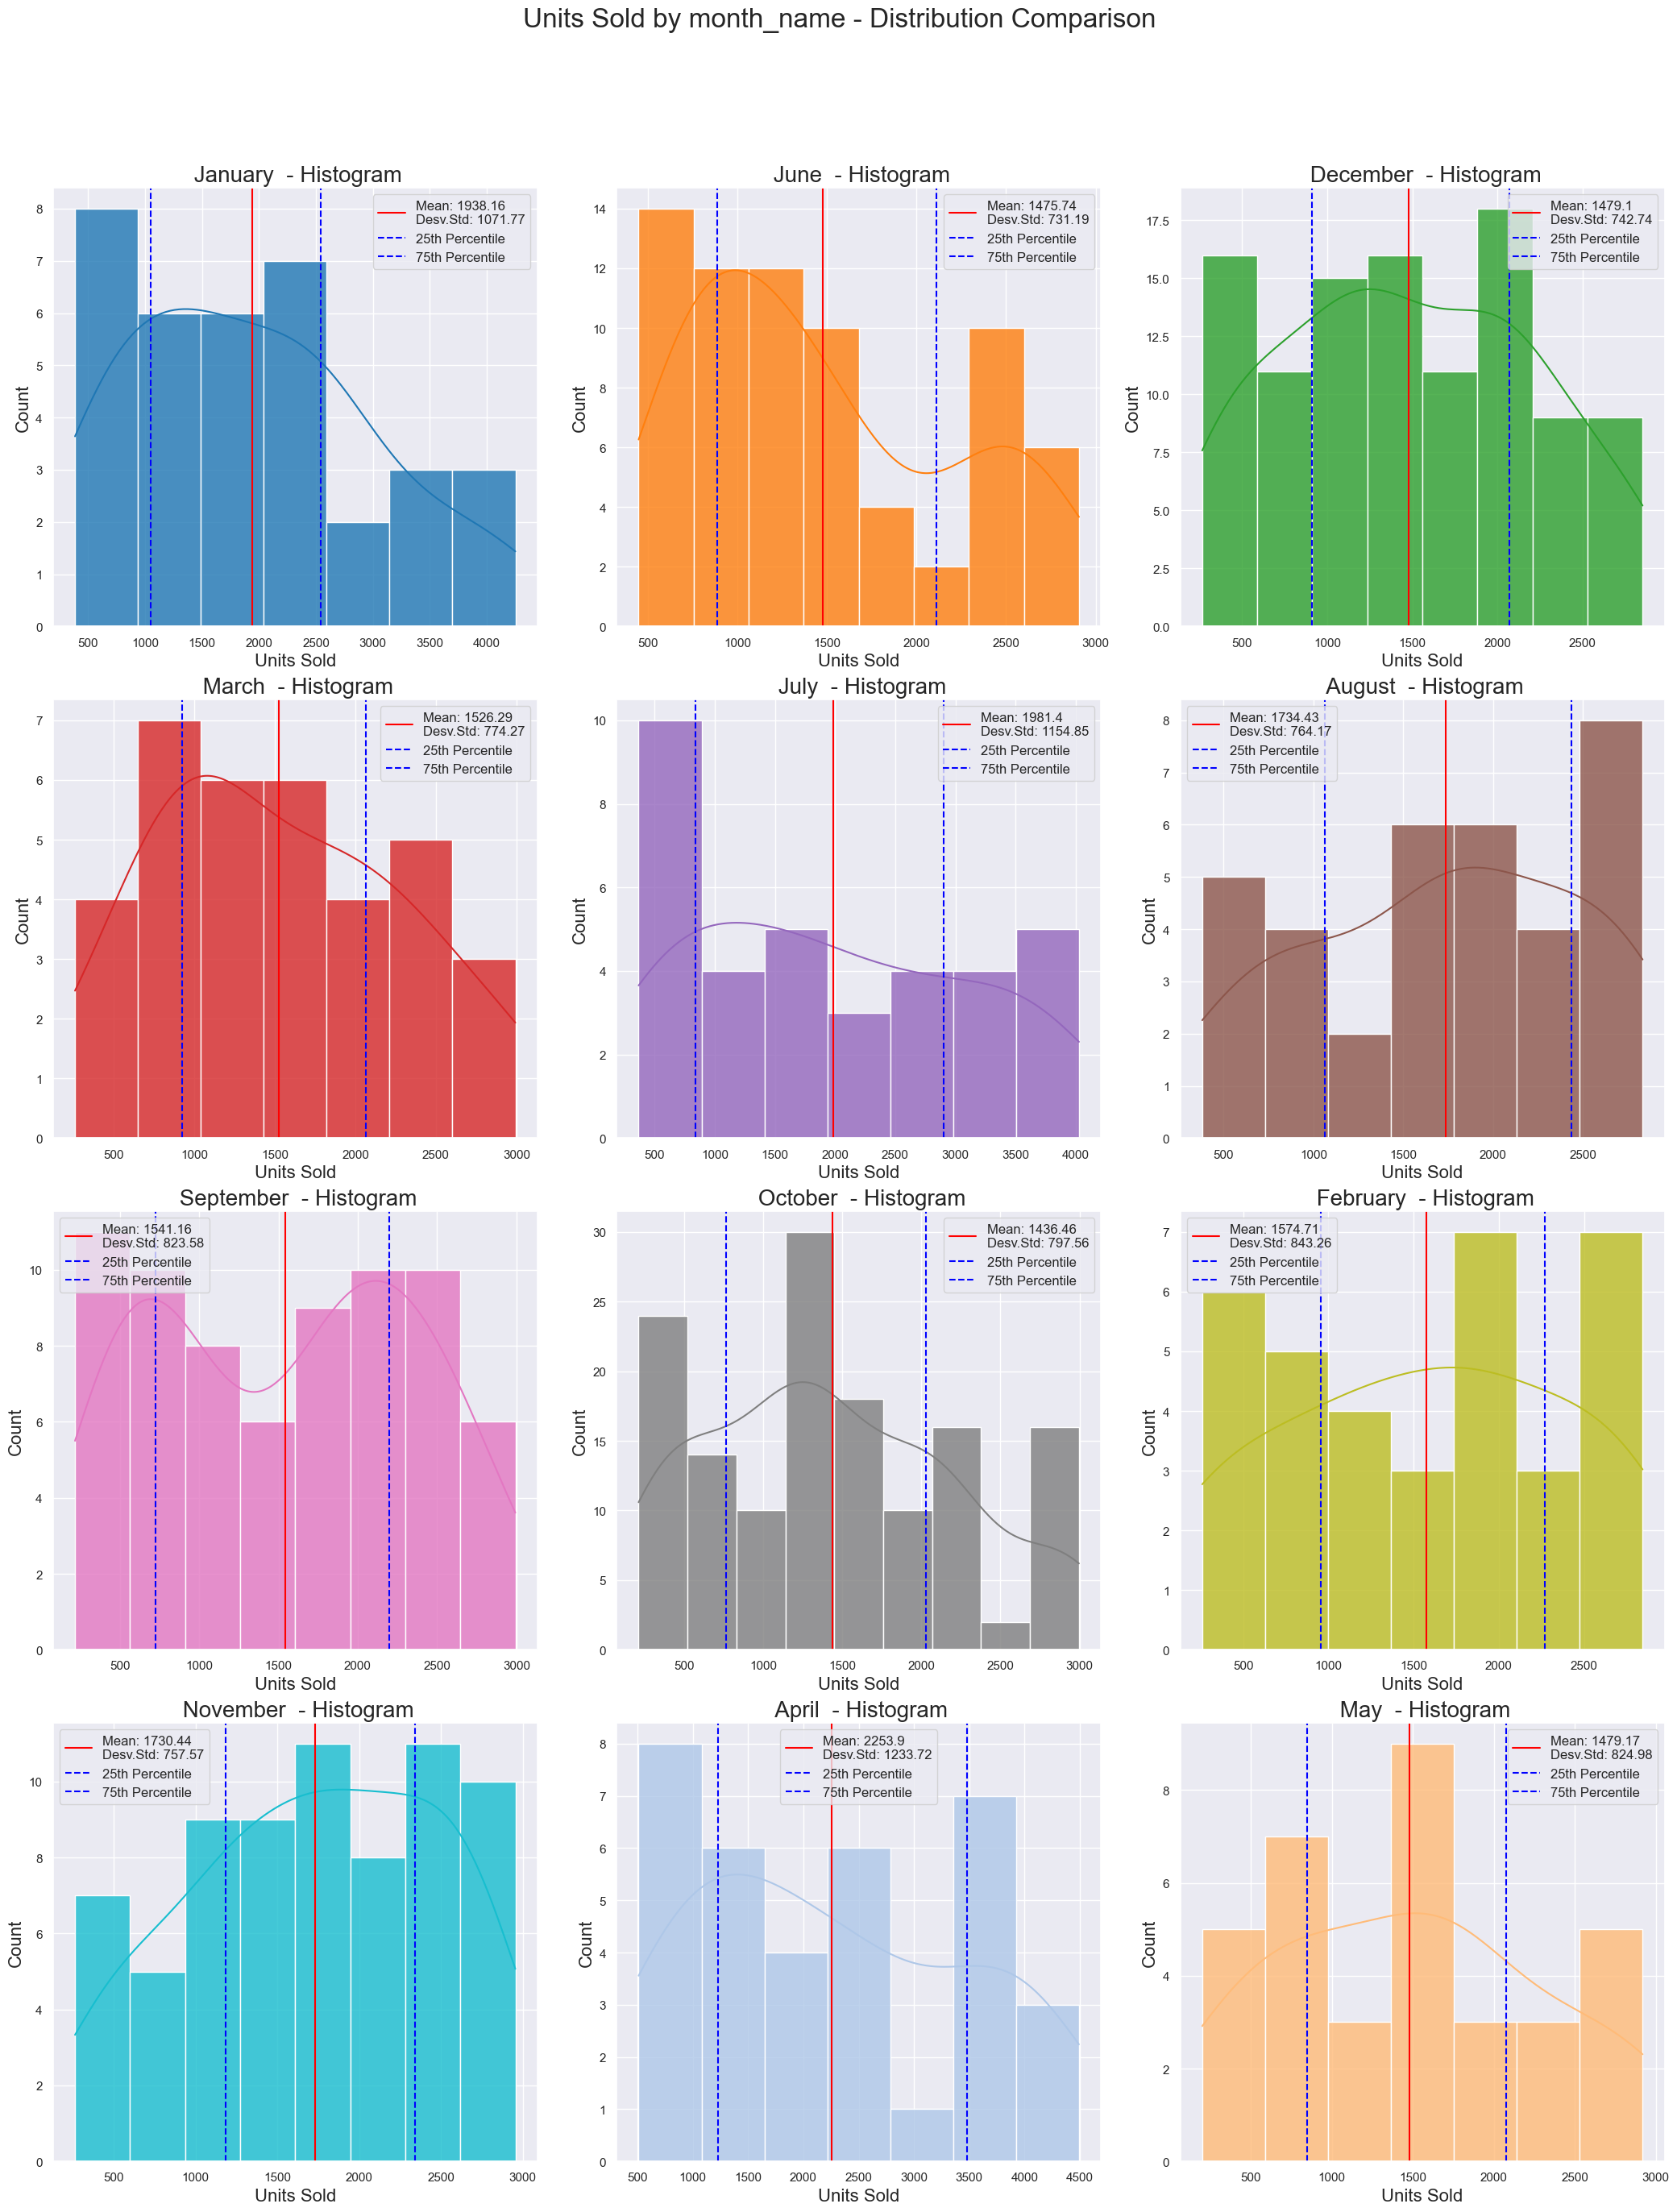

In [82]:
plot_grouped_distributions_2(data, group_column="month_name", target_column="units_sold", group_values=month_names, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by month_name")

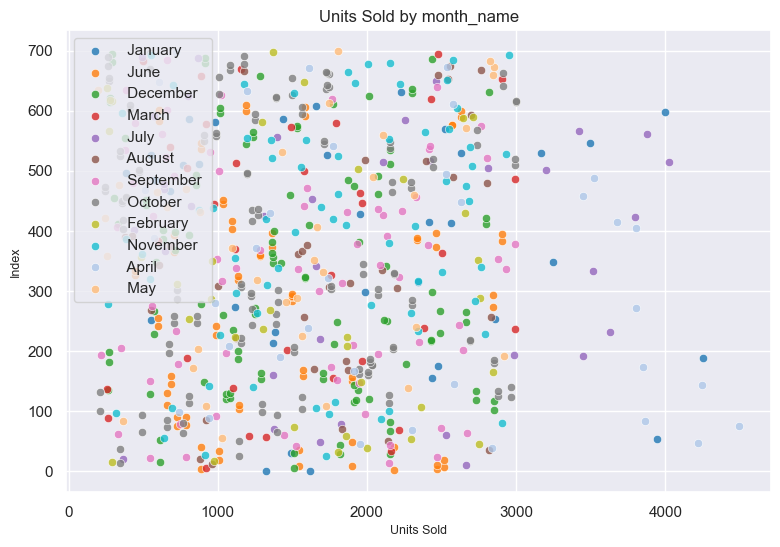

In [83]:
plot_grouped_distributions_3(data, group_column="month_name", target_column="units_sold", 
                           group_values=month_names, colors=colors, 
                           x_label="Units Sold", title_prefix="Units Sold by month_name", 
                           plot_type="scatter")

#### Análisis de la variable dependiente con dos o mas variables categoricas

Analizaremos la variable dependiente, con la variable mes y cada una de las otras variables categoricas

In [5]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

In [6]:
data["segment"].value_counts()

segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64

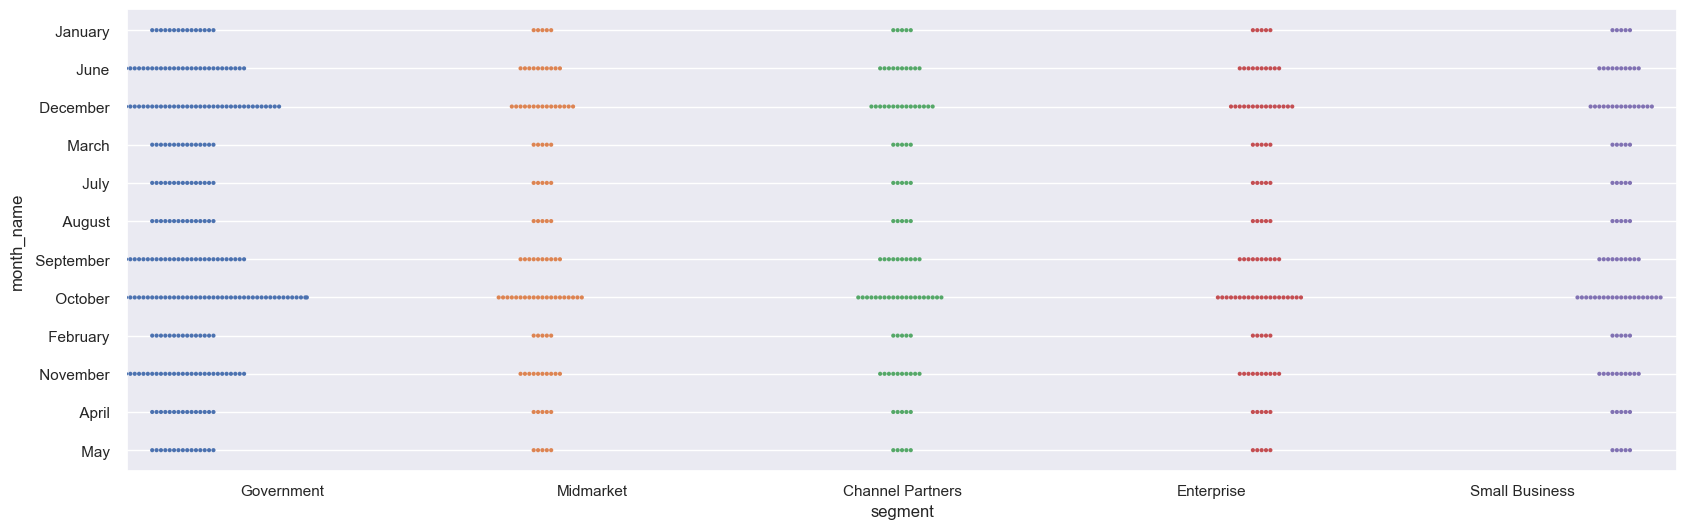

In [9]:


plt.figure(figsize=(20, 6))
# Reducir el tamaño de los marcadores
sns.swarmplot(data=data, x="segment", y="month_name", hue="segment", size=3, dodge = True)
# Agregar transparencia
# sns.swarmplot(data=data, x="Continent", y="Life expectancy", hue="Status", alpha=0.6)
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_by_month_and_segment(data, dependent_var, month_var, segment_var, colors=None):

    months = data[month_var].unique()
    segments = data[segment_var].unique()
    colors = colors or sns.color_palette("husl", len(segments))
    
    for month in months:
        month_data = data.loc[data[month_var] == month]
        
        plt.figure(figsize=(6, 4))
        for i, segment in enumerate(segments):
            segment_data = month_data.loc[month_data[segment_var] == segment]
            sns.kdeplot(
                segment_data[dependent_var], 
                label=segment, 
                fill=True, 
                color=colors[i % len(colors)], 
                alpha=0.8
            )
        
        plt.legend(title=segment_var, loc="upper right")
        plt.ylabel("Density")
        plt.xlabel(dependent_var)
        plt.title(f"{dependent_var} distribution in {month}")
        plt.tight_layout()
        plt.show()

# Ejemplo de uso:
# plot_kde_by_month_and_segment(data, "units_sold", "month_name", "segment")


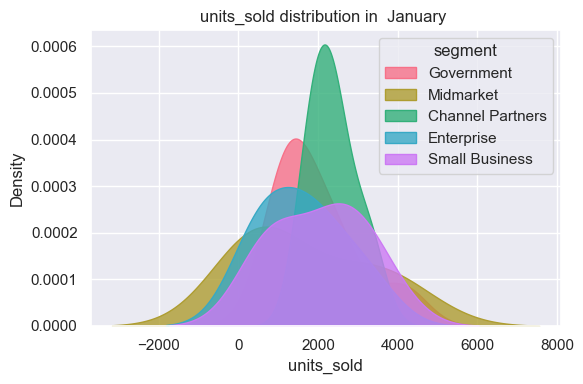

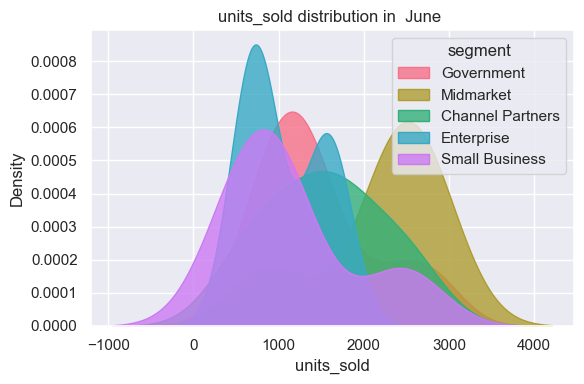

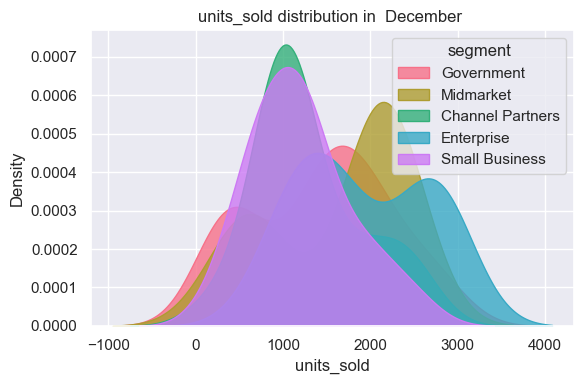

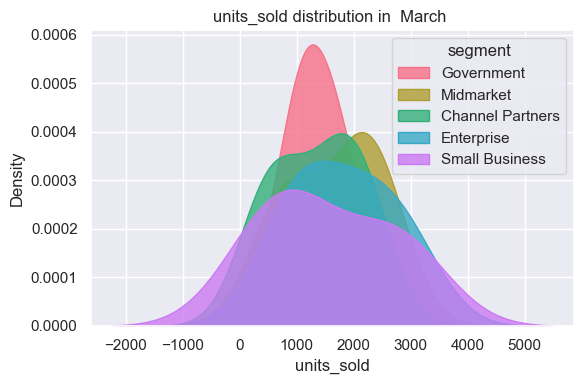

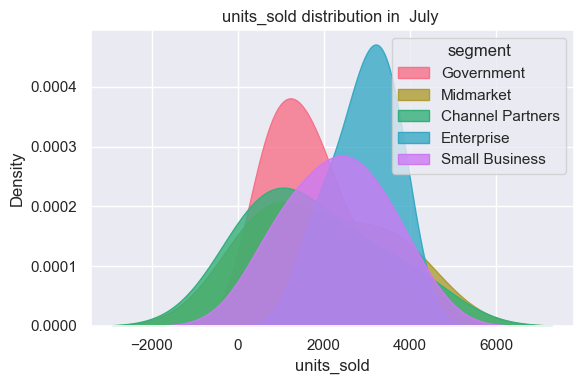

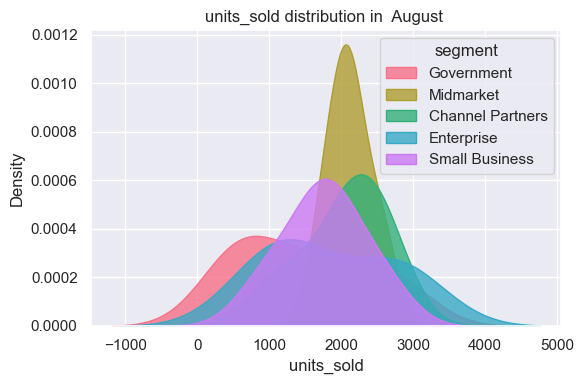

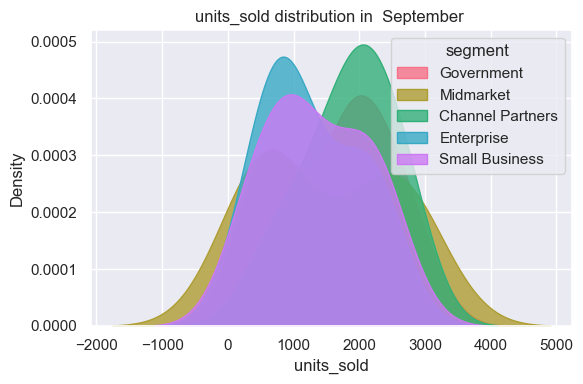

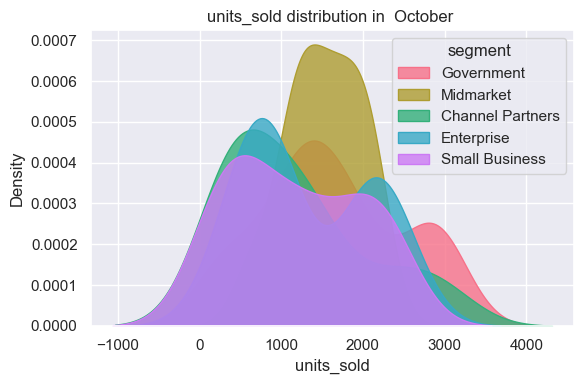

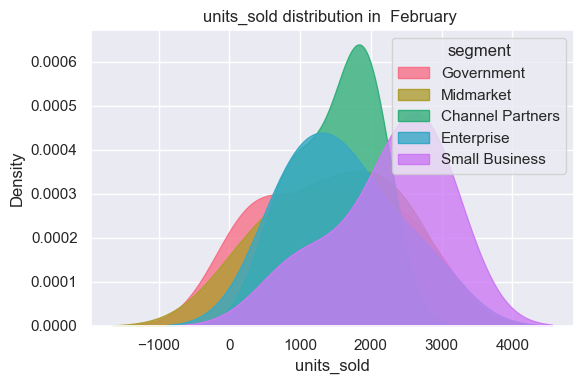

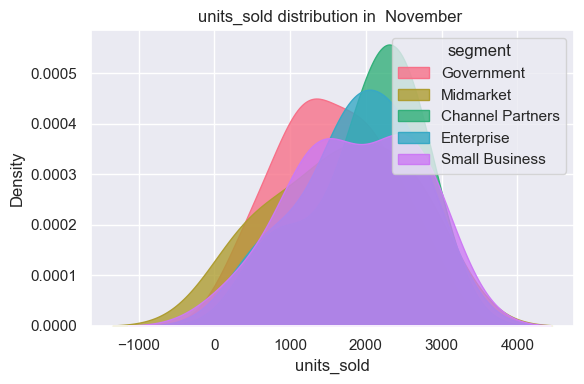

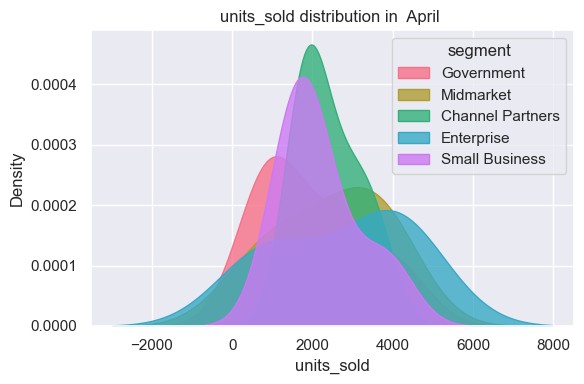

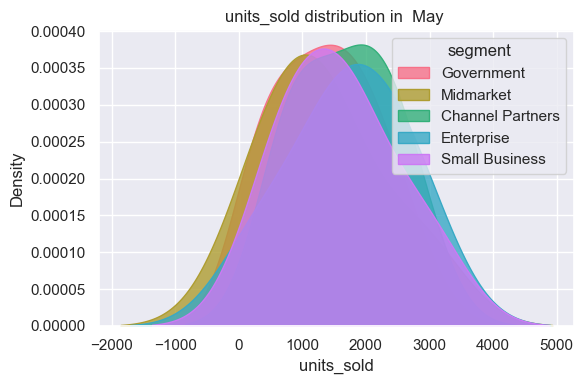

In [30]:
plot_kde_by_month_and_segment(data, "units_sold", "month_name", "segment")


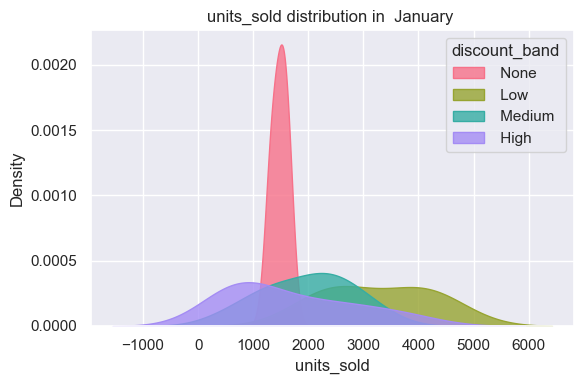

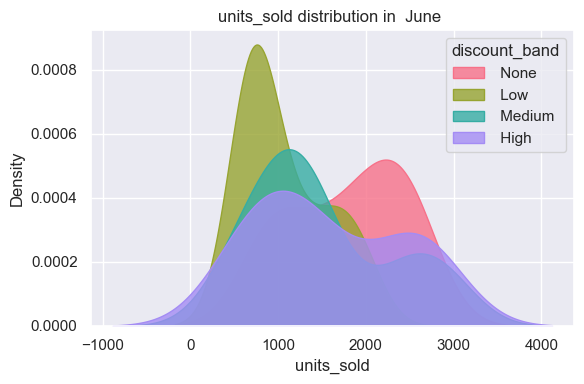

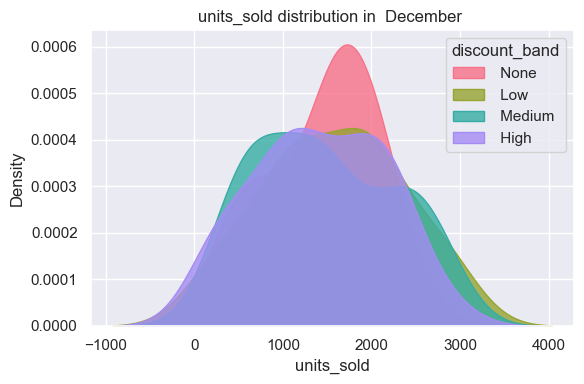

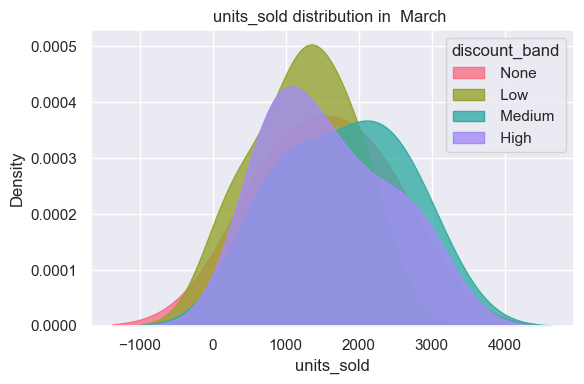

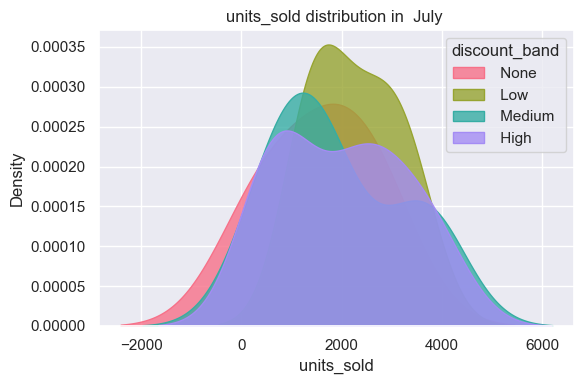

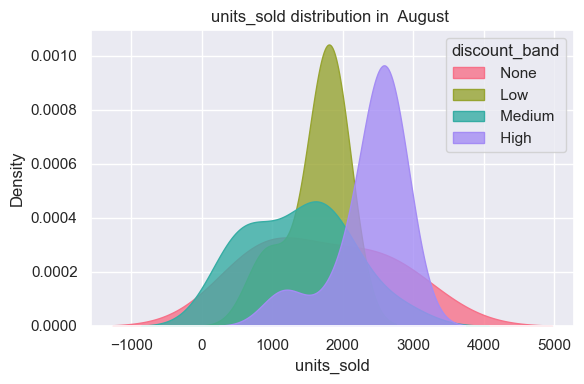

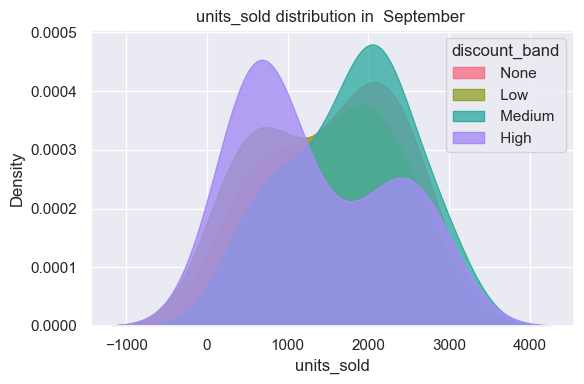

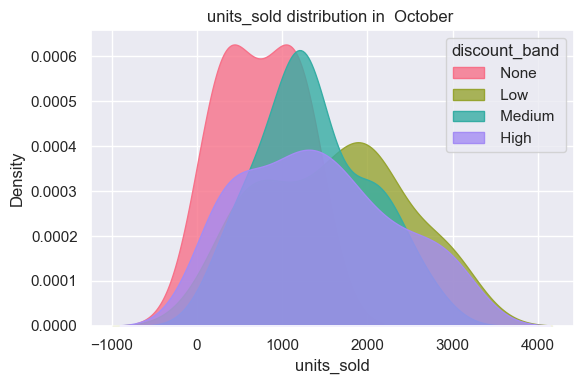

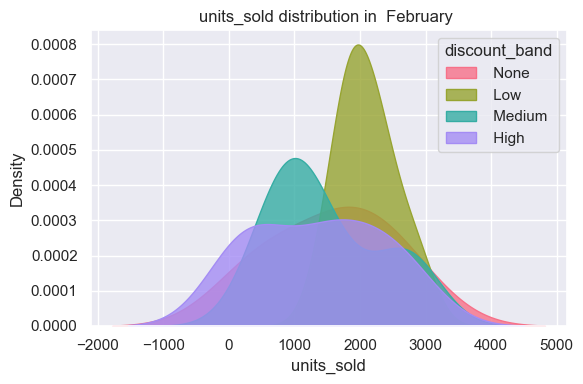

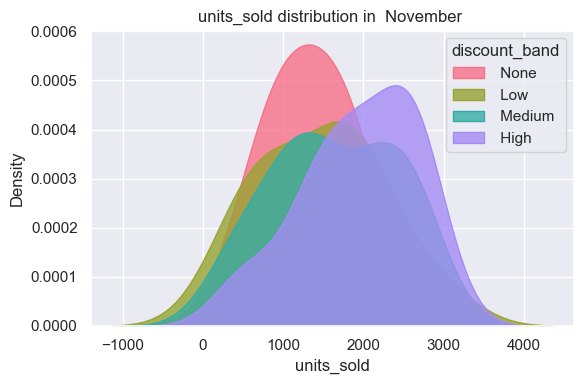

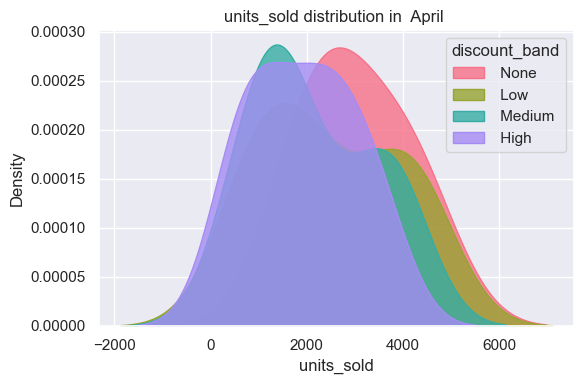

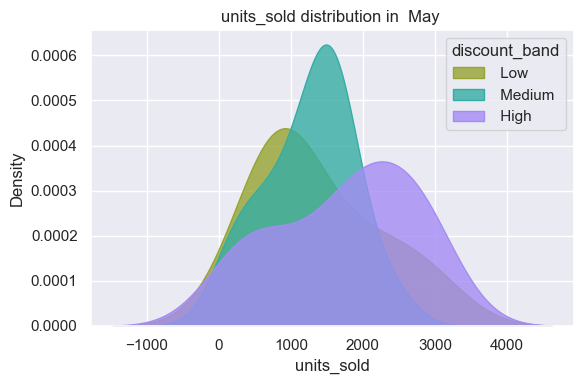

In [31]:
plot_kde_by_month_and_segment(data, "units_sold", "month_name", "discount_band")

In [ ]:
def plot_avg_units_sold(data, group_vars, value_var):

    # Agrupar los datos y calcular la media
    df_grouped = data.groupby(group_vars)[value_var].mean().reset_index()
    
    # Configurar el tamaño del gráfico
    plt.figure(figsize=(10, 4.5))
    
    # Crear el gráfico de líneas
    sns.lineplot(data=df_grouped, x=group_vars[0], y=value_var, hue=group_vars[1], marker='o')
    
    # Configuración de etiquetas y títulos
    plt.title(f'Promedio de {value_var} por {group_vars[0]} y {group_vars[1]}')
    plt.xlabel(group_vars[0])
    plt.ylabel(value_var)
    plt.legend(title=group_vars[1])
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()

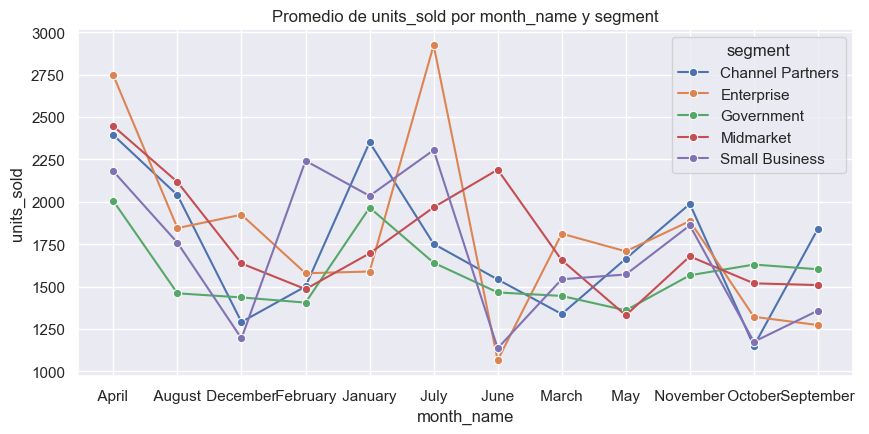

In [34]:
plot_avg_units_sold(data, ['month_name', 'segment'], 'units_sold')


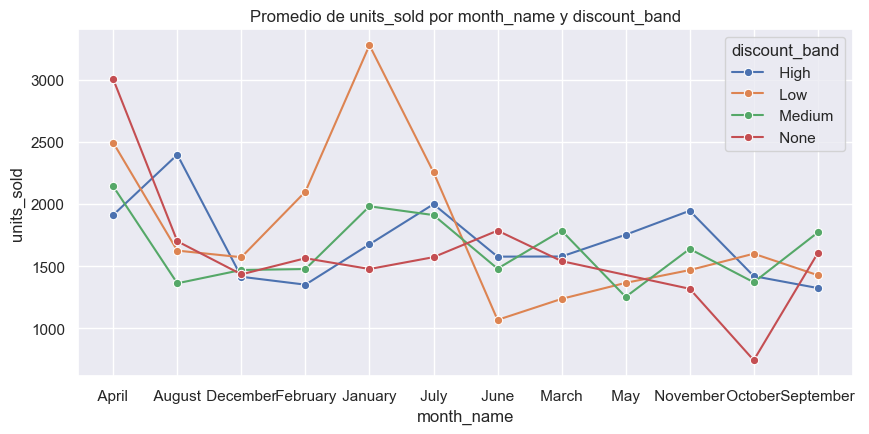

In [35]:
plot_avg_units_sold(data, ['month_name', 'discount_band'], 'units_sold')

In [ ]:
import plotly.express as px
import pandas as pd

def plot_avg_units_sold_interactive(data, group_vars, value_var):
    """

    """
    # Agrupar los datos y calcular la media
    df_grouped = data.groupby(group_vars)[value_var].mean().reset_index()
    
    # Crear el gráfico de líneas interactivo
    fig = px.line(
        df_grouped,
        x=group_vars[0],
        y=value_var,
        color=group_vars[1],
        markers=True,
        title=f'Promedio de {value_var} por {group_vars[0]} y {group_vars[1]}',
        labels={group_vars[0]: group_vars[0], value_var: value_var, group_vars[1]: group_vars[1]},
    )
    
    # Ajustar la presentación
    fig.update_layout(
        xaxis_title=group_vars[0],
        yaxis_title=value_var,
        legend_title=group_vars[1],
        hovermode="x unified",  # Muestra todos los valores al mismo tiempo en el hover
    )
    
    # Mostrar el gráfico
    fig.show()



In [37]:
plot_avg_units_sold_interactive(data, ['month_name', 'segment'], 'units_sold')


#### Análisis de la variable dependiente con variable categorica y varaibles numericas

In [ ]:
def plot_scatterplot(df, features, title='Features', columns=2, x_lim=None):
    df = df.copy()
    rows = math.ceil(len(features) / columns)
    
    fig, axes = plt.subplots(rows, columns, sharey=True, figsize=(14, 14))
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i + 1)
        correlation = df[feature].corr(df['units_sold'])
        r_squared = correlation ** 2
        sns.scatterplot(data=df, x=feature, y='units_sold', ax=ax,
                        label = f"corr = {round(correlation, 2)} \n r^2 = {round(r_squared, 2)}")

    
    fig.suptitle(f'{title} x units_sold', fontsize=25, x=0.56)
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    
    plt.show()
    #Plot units_sold  x positively correlated features
pos_correlated_features = ['cogs','gross_sales', 'sales']

title = 'Positively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

#### Analisis de De varaibles categoricas y numericas sin la varaiable dependiente

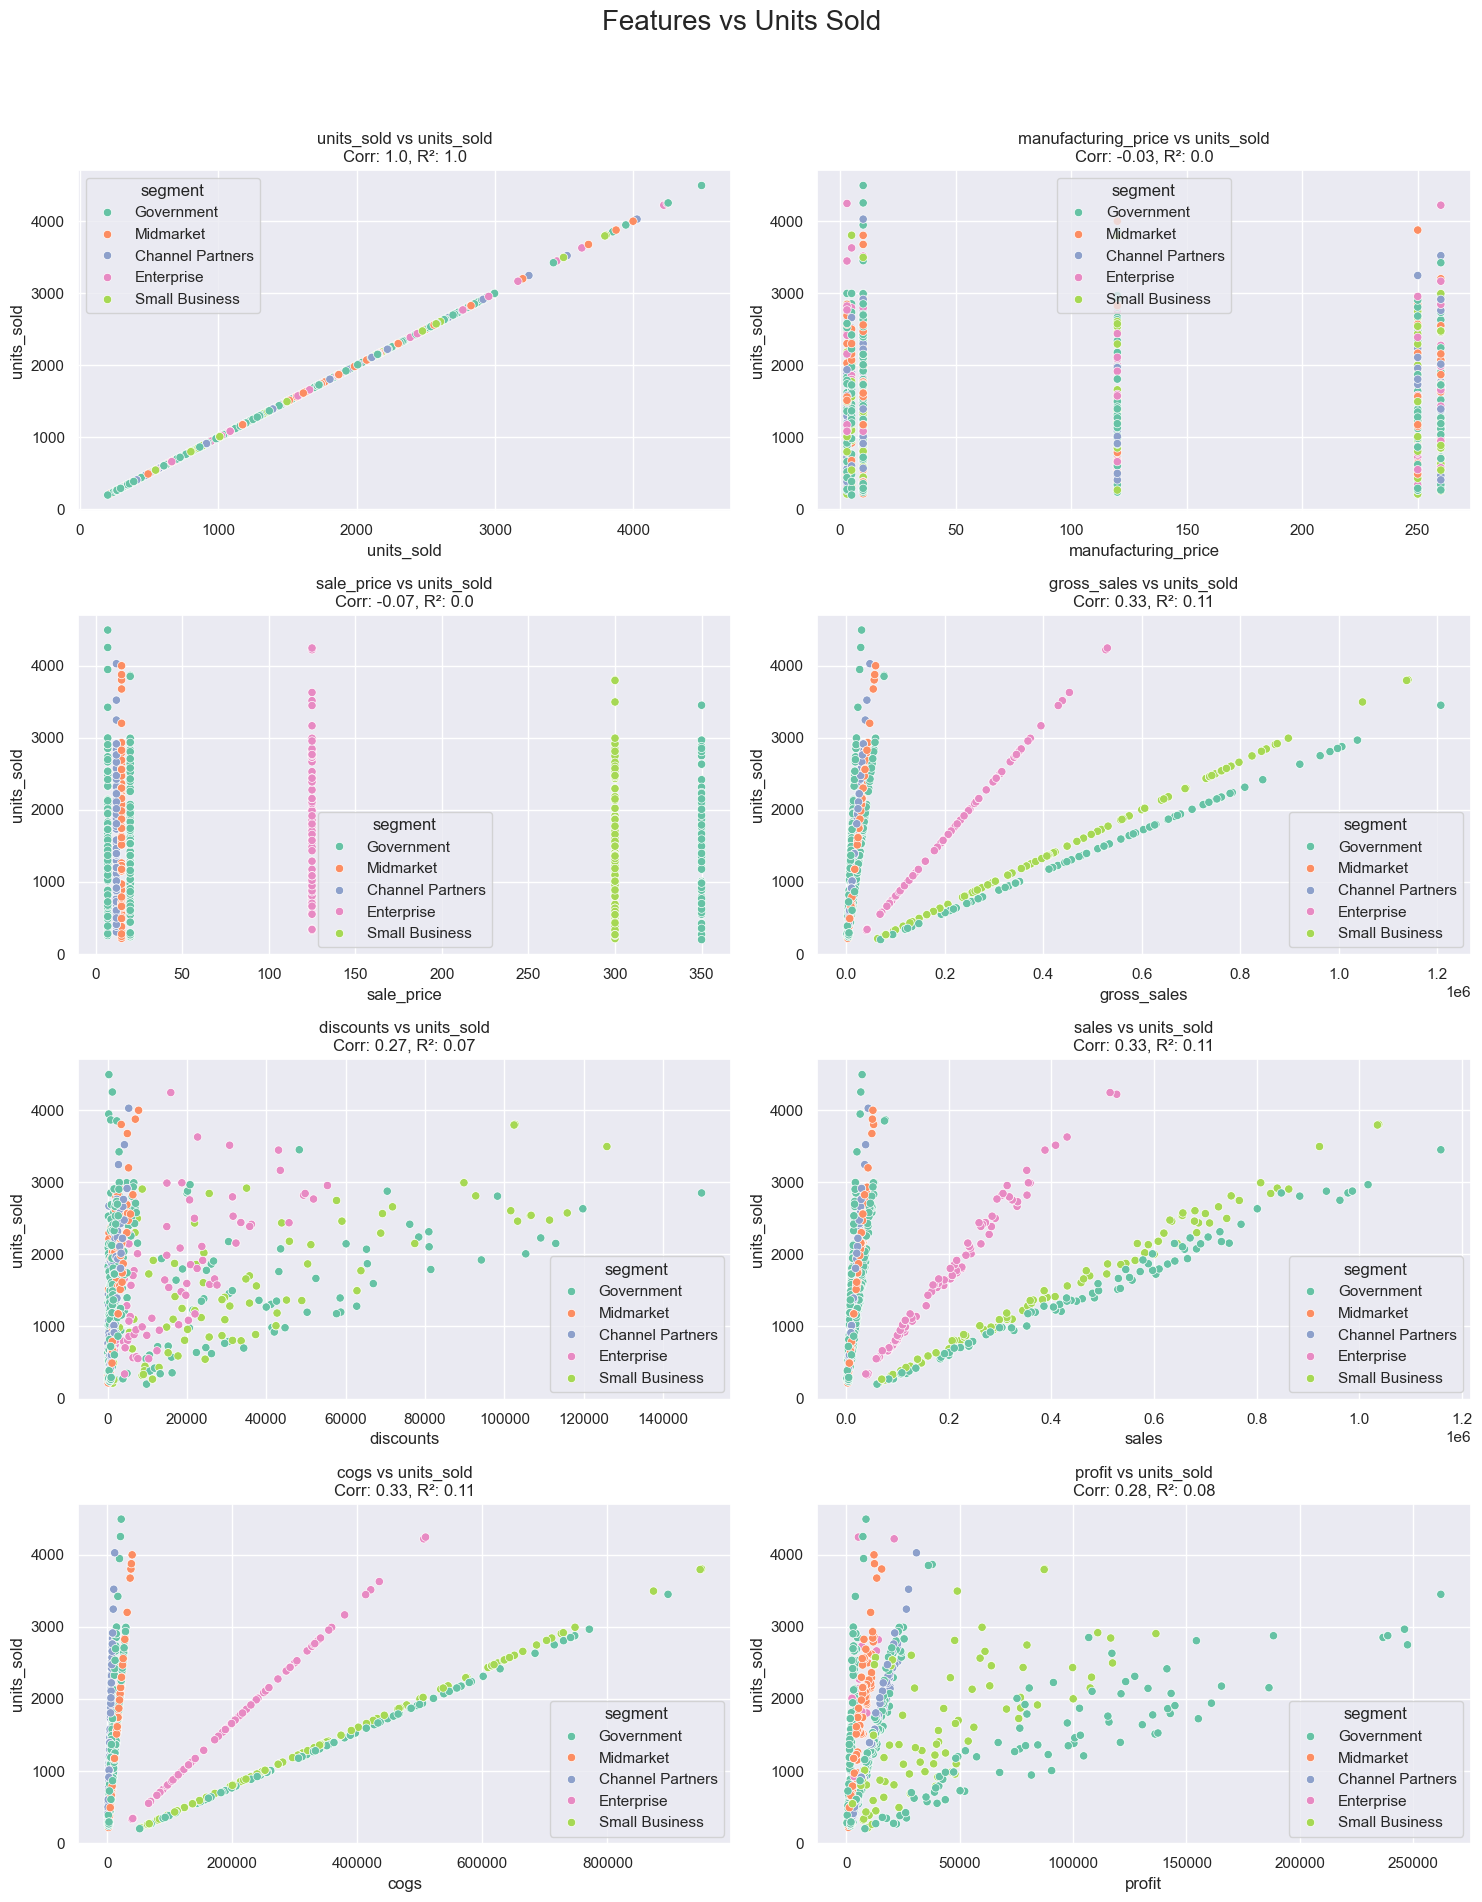

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_scatter_with_hue(data, x_features, y_feature, hue_feature, title='Scatterplot', columns=2):
    """
    Crea gráficos de dispersión para múltiples variables en el eje x y una variable fija en el eje y,
    incluyendo una variable categórica como `hue`.
    
    Parámetros:
    - data (pd.DataFrame): El DataFrame con los datos.
    - x_features (list): Lista de variables para el eje x.
    - y_feature (str): Nombre de la variable para el eje y.
    - hue_feature (str): Nombre de la variable categórica para colorear los puntos.
    - title (str): Título general de los gráficos.
    - columns (int): Número de columnas para organizar los subgráficos.
    
    Retorna:
    - None: Muestra los gráficos de dispersión.
    """
    data = data.copy()
    rows = math.ceil(len(x_features) / columns)
    
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Asegura que los ejes sean iterables
    
    for i, feature in enumerate(x_features):
        if i < len(x_features):
            ax = axes[i]
            correlation = data[feature].corr(data[y_feature])
            r_squared = correlation ** 2
            
            sns.scatterplot(
                data=data,
                x=feature,
                y=y_feature,
                hue=hue_feature,
                ax=ax,
                palette='Set2',
                legend='auto'
            )
            
            ax.set_title(f"{feature} vs {y_feature}\n"
                         f"Corr: {round(correlation, 2)}, R²: {round(r_squared, 2)}")
            ax.set_xlabel(feature)
            ax.set_ylabel(y_feature)
        else:
            fig.delaxes(axes[i])  # Elimina ejes no utilizados
    
    fig.suptitle(f'{title}', fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ejemplo de uso
x_features = ['units_sold', 'manufacturing_price', 'sale_price', 
              'gross_sales', 'discounts', 'sales', 'cogs', 'profit']
y_feature = 'units_sold'
hue_feature = 'segment'  # Cambiar por cualquier variable categórica en tu dataset
plot_scatter_with_hue(data, x_features, y_feature, hue_feature, title='Features vs Units Sold')


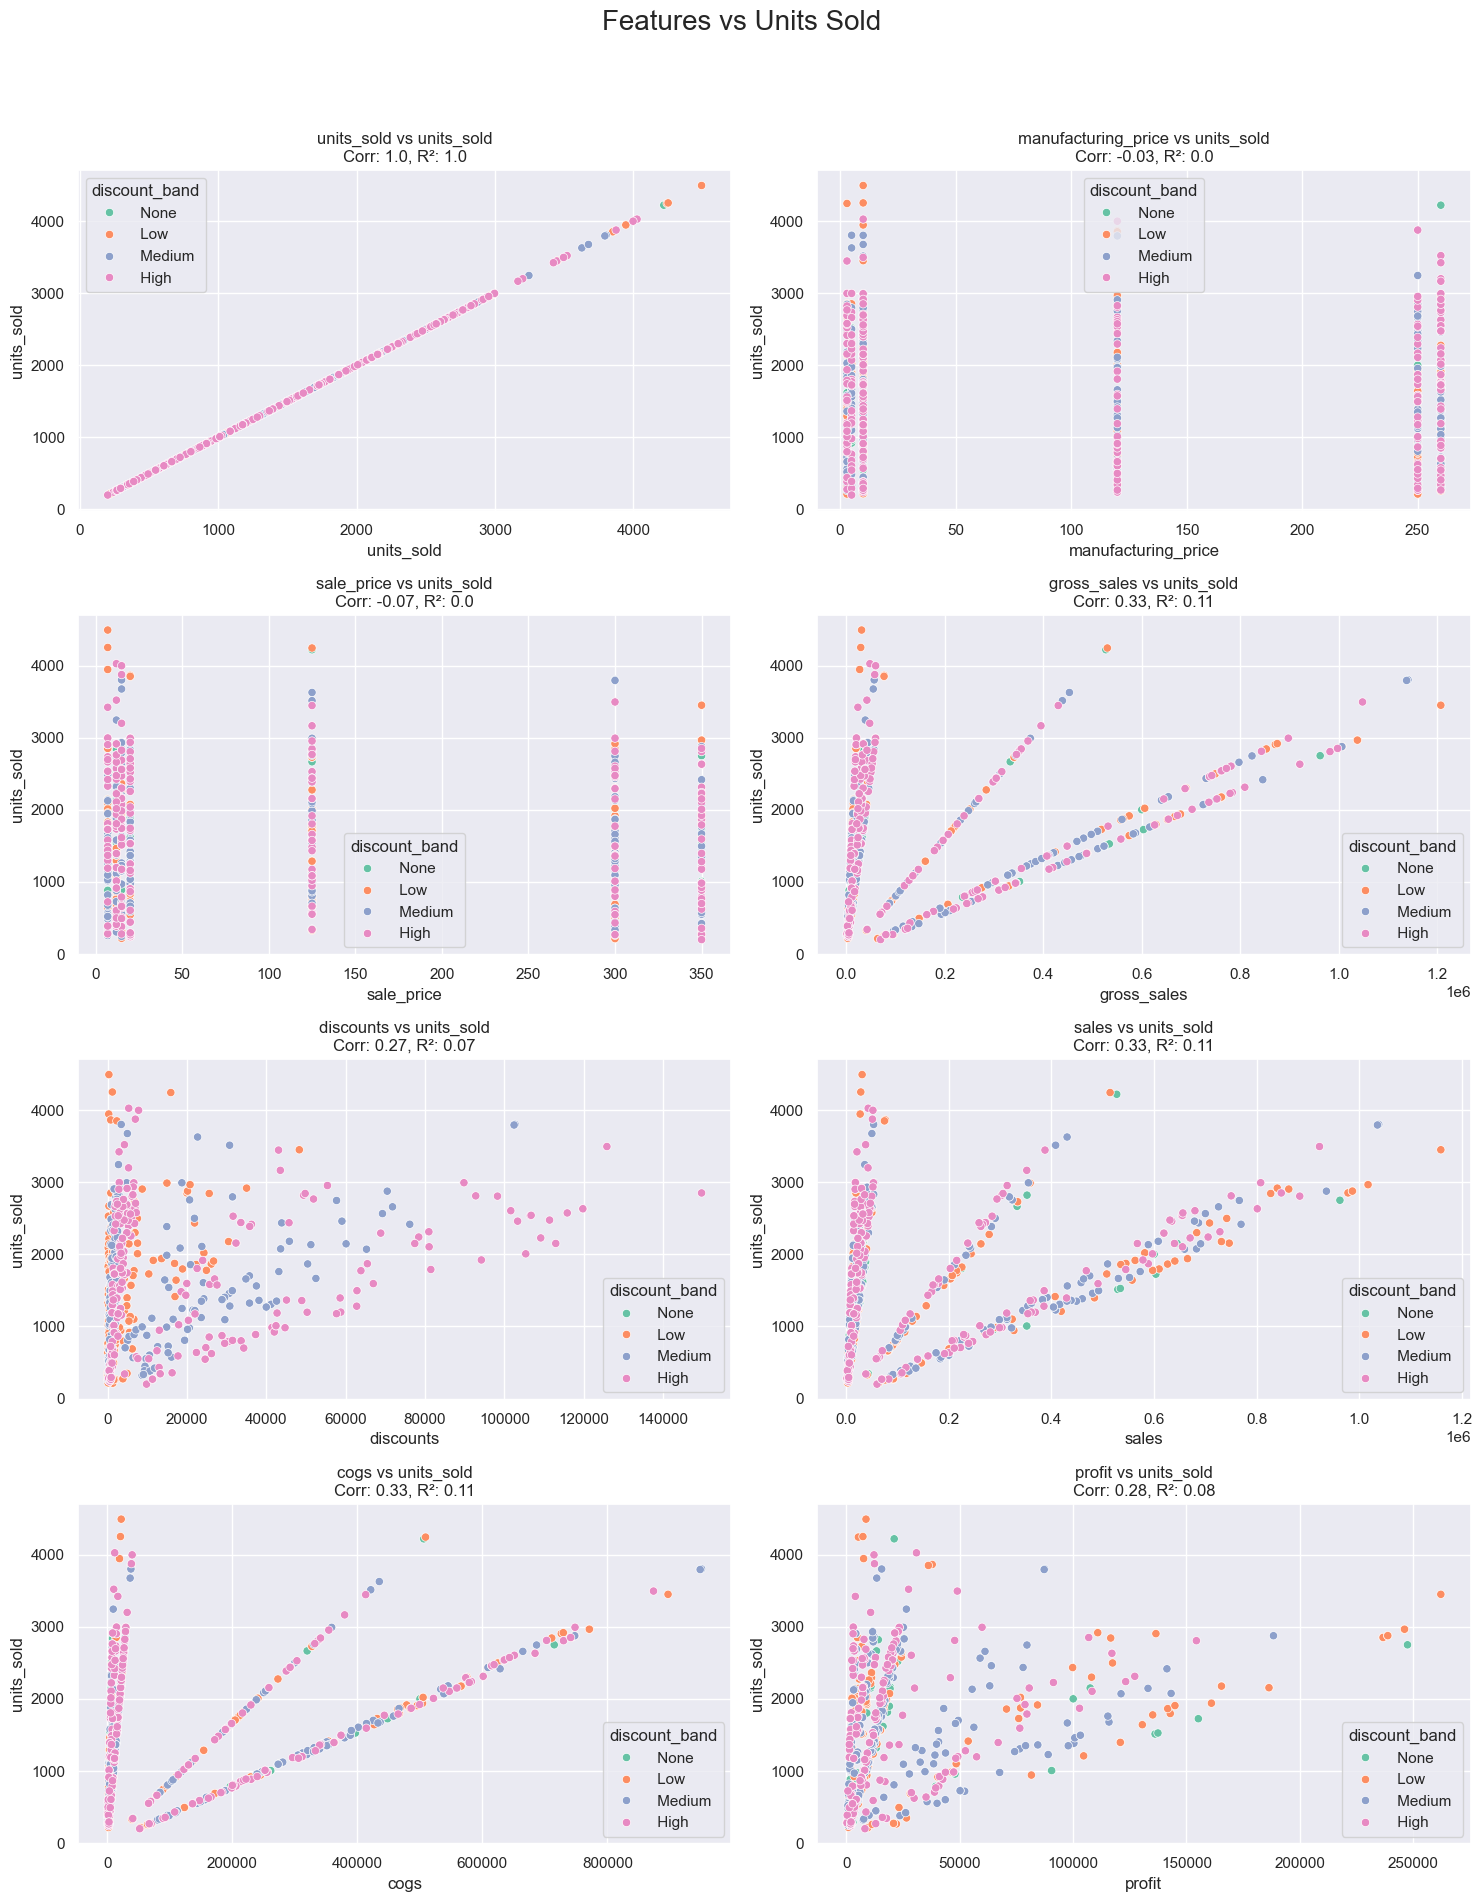

In [39]:
hue_feature = 'discount_band'  # Cambiar por cualquier variable categórica en tu dataset
plot_scatter_with_hue(data, x_features, y_feature, hue_feature, title='Features vs Units Sold')

### Analisis de series de tiempo

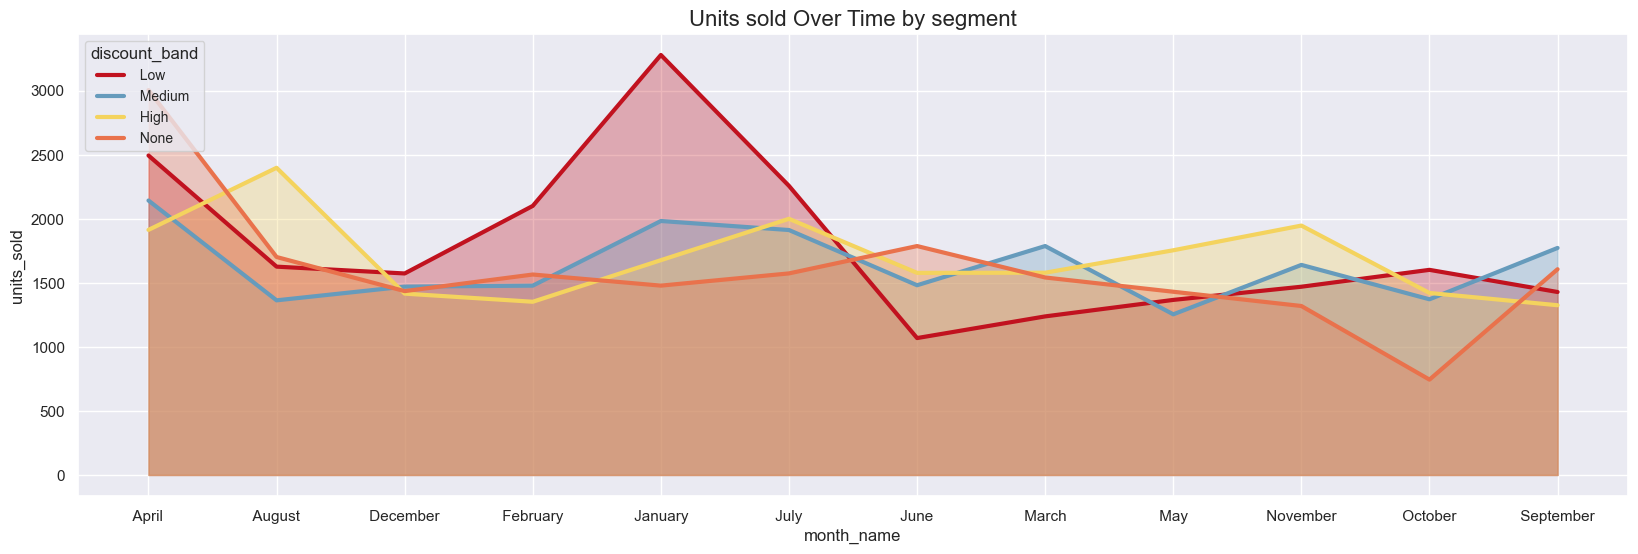

In [ ]:
import matplotlib.pyplot as plt

def plot_filled_lines(data, date_col, y_col, hue_col, colors, title='Line Plot'):
    """
    Crea un gráfico de líneas con áreas sombreadas para categorías específicas.
    
    Parámetros:
    - data (pd.DataFrame): El DataFrame que contiene los datos.
    - date_col (str): El nombre de la columna que contiene las fechas o años (eje x).
    - y_col (str): El nombre de la columna numérica para el eje y.
    - hue_col (str): El nombre de la columna categórica para segmentar los datos.
    - colors (list): Lista de colores para las categorías en hue_col.
    - title (str): Título del gráfico.
    
    Retorna:
    - None: Muestra el gráfico generado.
    """
    # Asegurarse de que los datos están ordenados por fecha
    data = data.sort_values(by=date_col).copy()
    
    # Identificar las categorías únicas en el hue
    categories = data[hue_col].unique()
    
    fig, ax = plt.subplots(figsize=(20, 6))
    
    for i, category in enumerate(categories):
        subset = data[data[hue_col] == category]
        grouped = subset.groupby(date_col)[y_col].mean()
        
        # Crear la línea y sombrear el área
        ax.plot(grouped.index, grouped.values, label=category, color=colors[i], linewidth=3)
        ax.fill_between(grouped.index, grouped.values, color=colors[i], alpha=0.3)
    
    # Personalización del gráfico
    ax.set_xlabel(date_col, fontsize=12)
    ax.set_ylabel(y_col, fontsize=12)
    ax.set_title(title, fontsize=16)
    ax.legend(title=hue_col, fontsize=10, loc='upper left')
    ax.grid(True)
    
    plt.show()

# Ejemplo de uso
plot_filled_lines(
    data=data, 
    date_col='month_name', 
    y_col='units_sold', 
    hue_col='discount_band', 
    colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857',"8c564b"], 
    title='Units sold Over Time by discount'
)


In [57]:
import plotly.express as px

def plot_interactive_filled_lines(data, date_col, y_col, hue_col, title='Interactive Line Plot',bg_color="white"):
    """
    Crea un gráfico de líneas interactivo con áreas sombreadas.
    
    Parámetros:
    - data (pd.DataFrame): El DataFrame que contiene los datos.
    - date_col (str): El nombre de la columna que contiene las fechas o años (eje x).
    - y_col (str): El nombre de la columna numérica para el eje y.
    - hue_col (str): El nombre de la columna categórica para segmentar los datos.
    - title (str): Título del gráfico.
    
    Retorna:
    - None: Muestra el gráfico generado.
    """
    # Calcular el promedio para las categorías
    grouped = data.groupby([date_col, hue_col])[y_col].mean().reset_index()
    
    # Crear gráfico interactivo con Plotly
    fig = px.line(
        grouped,
        x=date_col,
        y=y_col,
        color=hue_col,
        title=title,
        labels={date_col: "Time", y_col: "Value", hue_col: "Category"},
        hover_data={y_col: True, hue_col: True},
    )
    
    # Personalización adicional
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black'),
        legend_title=dict(font=dict(size=12)),
        title=dict(font=dict(size=18), x=0.5),
        hoverlabel=dict(font_size=12),
        width=950,  # Ajustar el ancho aquí (más largo en X)
        height=600,  # Ajustar la altura aquí
    )
    
    # Agregar información al pasar el cursor
    fig.update_traces(
        mode="lines+markers",
        line_shape="spline",
        hovertemplate='<b>%{x}</b><br>%{y}<br>Category: %{legendgroup}',
    )
    
    fig.show()

# Ejemplo de uso
plot_interactive_filled_lines(
    data=data, 
    date_col='month_name', 
    y_col='units_sold', 
    hue_col='discount_band', 
    bg_color="lightgray",
    title='Interactive Units Sold Over Time by Discount Band'
)


In [58]:
plot_interactive_filled_lines(
    data=data, 
    date_col='month_name', 
    y_col='units_sold', 
    hue_col='segment', 
    bg_color="lightgray",
    title='Interactive Units Sold Over Time by Discount Band'
)

In [69]:
data['media_units_sold'] = data['units_sold'].rolling(window=365).mean()
data.tail(10)

segment                   country     product discount_band  \
690        Government  United States of America        VTT          High    
691         Midmarket                   Germany        VTT          High    
692        Enterprise                    Canada        VTT          High    
693        Enterprise                   Germany        VTT          High    
694        Government                    France        VTT          High    
695    Small Business                    France   Amarilla          High    
696    Small Business                    Mexico   Amarilla          High    
697        Government                    Mexico    Montana          High    
698        Government                    Canada      Paseo          High    
699  Channel Partners  United States of America        VTT          High    

     units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
690       267.0                250.0        20.0       5340.0     801.00   
691      1175.0                250.0        15.0      17625.0    2643.75   
692      2954.0                250.0       125.0     369250.0   55387.50   
693       552.0                250.0       125.0      69000.0   10350.00   
694       293.0                250.0        20.0       5860.0     879.00   
695      2475.0                260.0       300.0     742500.0  111375.00   
696       546.0                260.0       300.0     163800.0   24570.00   
697      1368.0                  5.0         7.0       9576.0    1436.40   
698       723.0                 10.0         7.0       5061.0     759.15   
699      1806.0                250.0        12.0      21672.0    3250.80   

         sales      cogs    profit       date  month_number  month_name  year  \
690    4539.00    2670.0   1869.00 2013-01-10            10    October   2013   
691   14981.25   11750.0   3231.25 2014-01-10            10    October   2014   
692  313862.50  354480.0       NaN 2013-01-11            11   November   2013   
693   58650.00   66240.0       NaN 2014-01-11            11   November   2014   
694    4981.00    2930.0   2051.00 2014-01-12            12   December   2014   
695  631125.00  618750.0  12375.00 2014-01-03             3      March   2014   
696  139230.00  136500.0   2730.00 2014-01-10            10    October   2014   
697    8139.60    6840.0   1299.60 2014-01-02             2   February   2014   
698    4301.85    3615.0    686.85 2014-01-04             4      April   2014   
699   18421.20    5418.0  13003.20 2014-01-05             5        May   2014   

     media_units_sold  
690       1595.917808  
691       1594.312329  
692       1601.178082  
693       1596.715068  
694       1592.104110  
695       1592.909589  
696       1587.556164  
697       1586.641096  
698       1587.394521  
699       1582.717808

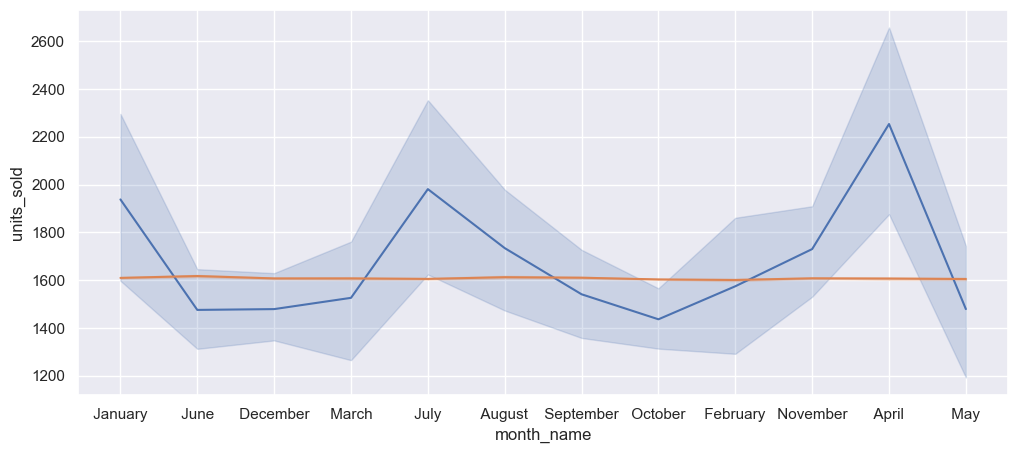

In [67]:
plt.figure(figsize=(12,5))
sns.lineplot(data= data, y = "units_sold", x = "month_name")
sns.lineplot(data=data, y= "media_units_sold",x = "month_name")
plt.show()